<a href="https://colab.research.google.com/github/Seboldju/JS_JR_NK_Softwareentwicklung-Tankstellen/blob/main/Volz_Abgabe_Final_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Augabenstellung und Vorgehen

**Aufgabenstellung**

Ziel des Projekts ist es, eine Tankstelle in Pforzheim auszuwählen und deren Hauptwettbewerber zu identifizieren. Anschließend sollen die Preisstrategien der Tankstellen analysiert und sinnvolle Empfehlungen für die zukünftige Gestaltung der Preise unserer Tankstelle abgegeben werden.

**Vorgehen**

Im ersten Schritt haben wir uns für eine Tankstelle entschieden, die aus unserer Sicht interessant ist. Die Wahl fiel hierbei auf die Aral Tankstelle in der Lochäcker Straße in Pforzheim, die zwischen der Autobahnausfahrt Pforzheim Nord und dem Stadtgebiet angesiedelt ist. Eine ausführliche Beschreibung der Tankstelle erfolgt im Laufe des Notebooks.

Anschließend wollen wir durch eine Clusteranalyse einen allgemeinen Überblick über den gesamten Tankstellenmarkt in Pforzheim erhalten und die Tankstellen in verschiedene Cluster einteilen, um erste Rückschlüsse auf deren Preisstrategie und die unterschiedlichen Anbietersegmente unter den Pforzheimer Tankstellen zu erhalten. Für die Clusteranalyse wählen wir einen Analysezeitraum von 30 Tagen, da die Gefahr besteht, dass Tankstellen in einem längeren Zeitraum ihre Preisstrategie maßgeblich verändern und diese Veränderung die Clusterergebnisse verwässern könnte. Das Ziel der Clusteranalyse ist, dass wir einen Hauptkonkurrenten identifizieren, der sich im selben Cluster wie unsere Tankstelle befindet und sich somit auf einem ähnlichen Preisniveau bewegt.

Daher wählen wir nach der Clusteranalyse zwei Konkurrenten aus, die wir zusammen mit unserer Tankstelle deskriptiv näher beschreiben und deren Preisverläufe vergleichen. Hierdurch sollen tiefere Einblicke in die Preisstrategien der Tankstellen gewonnen und der Preisführer identifiziert werden. Basierend auf den Ergebnissen der deskriptiven Analysen erhalten wir bereits die wichtigsten Erkenntnisse für unsere Preisstrategie.

Doch um diese auch sinnvoll umsetzen zu können und strategische Fehler in der Preisstrategie zu vermeiden, analysieren wir im Anschluss die Preisentwicklung anhand einer Zeitreihenanalyse. Hierfür müssen wir uns zunächst darauf festlegen, den Preisverlauf welcher Tankstelle wir analysieren möchten, welche Kraftstofftypen wir berücksichtigen und welche Granularität der Zeitreihe wir berücksichtigen. Um im Rahmen der Zeitreihenanalyse auch auf längere Trends eingehen zu können, verdoppeln wir den Analysezeitraum für diesen Teil. Ziel dabei ist nicht nur die Vorhersage von zukünftigen Preisen, sondern auch die detaillierte Analyse deterministischer Komponenten der Zeitreihe wie dem Trend oder Saisonkomponenten, um die Preisentwicklung sehr gut zu verstehen und unsere Preisstrategie daran auszurichten. Das hilft uns bei der Entscheidung der Gestaltung der zukünftigen Preise.

Zum Ende hin fassen wir die Ergebnisse noch einmal zusammen und geben unsere Empfehlungen für die Preisstrategie der Aral Lochäcker ab.

# Auswahl der Tankstelle und des Betrachtungszeitraums


In [ ]:
id = "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7" # ID unserer gewählten Tankstelle (Aral Tankstelle Lochäckerstraße 294)
ids_pf = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"] #ID der Pforzheimer Tankstellen
days = 30 # Anzahl der betrachteten Tage, von heute aus rückwärts gezählt

# Installation notwendiger Bibliotheken TBD

In [ ]:
import datetime
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from google.colab import files


# Generierung Downloadlink und herunterladen aktueller Daten

In [ ]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
print(yesterday)

2024-06-25


In [ ]:
twodaysago = today - datetime.timedelta(days=2)

In [ ]:
def linkFromDate(date) :
  link_prefix = "https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=/prices/"
  link_datepart = "2024/04/2024-04-23"
  link_datepart = date.strftime('%Y/%m/%Y-%m-%d')
  link_postfix = "-prices.csv"
  link = link_prefix + link_datepart + link_postfix
  return link

In [ ]:
link = linkFromDate(twodaysago)

In [ ]:
def downloadData(url) :
  command = ["wget", "-O","prices.csv",url]
  result = subprocess.run(command, capture_output=True, text=True)
  # Print the output from the command
  # print("Output:")
  # print(result.stdout)
  # Check for errors
  if result.stderr:
    print("Error:")
    print(result.stderr)

In [ ]:
raw_data = None
for i in range(days):
  day = today - datetime.timedelta(days=(days-i))
  # print(day)
  link = linkFromDate(day)
  try:
    downloadData(link)
    df = pd.read_csv("prices.csv")
    # df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S+02', , utc=True)
    df.date = pd.to_datetime(df.date, utc=True)
    if(raw_data is None) :
      raw_data = df
    else :
      raw_data = pd.concat([raw_data, df], ignore_index=True)
  except:
    print("Could not download or process " + link)
raw_data.describe()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 22800K .......... .......... .......... .......... .......... 18.9M
 22850K .......... .......... .......... .......... .......... 18.8M
 22900K .......... .......... .......... .......... .......... 17.9M
 22950K .......... .......... .......... .......... .......... 20.5M
 23000K .......... .......... .......... .......... .......... 18.4M
 23050K .......... .......... .......... .......... .......... 18.0M
 23100K .......... .......... .......... .......... .......... 19.6M
 23150K .......... .......... .......... .......... .......... 24.3M
 23200K .......... .......... .......... .......... .......... 18.0M
 23250K .......... .......... .......... .......... .......... 21.0M
 23300K .......... .......... .......... .......... .......... 19.0M
 23350K .......... .......... .......... .......... .......... 22.6M
 23400K .......... .......... .......... .......... .......... 22.7M
 23450K .......... .......... ......

,diesel,e5,e10,dieselchange,e5change,e10change
count,1.232660e+07,1.232660e+07,1.232660e+07,1.232660e+07,1.232660e+07,1.232660e+07
mean,1.645362e+00,1.799418e+00,1.693307e+00,7.835201e-01,7.747155e-01,7.522351e-01
std,5.589811e-02,2.308624e-01,3.601562e-01,4.120895e-01,4.180406e-01,4.320163e-01
min,-1.000000e-03,0.000000e+00,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.609000e+00,1.789000e+00,1.729000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.639000e+00,1.819000e+00,1.759000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.679000e+00,1.859000e+00,1.799000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,4.989000e+00,4.480000e+00,4.449000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [ ]:
raw_data.head(20)

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2024-05-26 22:01:54+00:00,b78ace98-5bde-4f84-9820-8abd807e9644,1.699,1.919,1.859,1,1,1
1,2024-05-26 22:01:54+00:00,cf407ea4-797b-47d0-a135-c092b0af88c0,1.649,1.859,1.799,1,1,1
2,2024-05-26 22:01:54+00:00,3793b323-9a75-47fb-acc1-4ee3ca765f9d,1.599,1.819,1.759,1,1,1
3,2024-05-26 22:01:54+00:00,3a249ad4-1874-4200-9fb0-937a9030bf7b,1.679,1.879,1.819,1,1,1
4,2024-05-26 22:01:54+00:00,f8a5705a-1640-4fe3-b2a7-90b7da06143d,1.629,1.839,1.779,1,1,1
5,2024-05-26 22:01:54+00:00,099135a2-6ee7-4f1f-963f-f634f49812d0,1.599,0.000,0.000,0,2,2
6,2024-05-26 22:01:54+00:00,0a2741c5-6abe-4e2b-b9c4-86e687c94c08,1.609,1.839,1.779,1,1,1
7,2024-05-26 22:01:54+00:00,47e4cc7d-d57d-4d98-a0c1-500181dd3e61,1.619,1.829,1.799,0,0,1
8,2024-05-26 22:02:55+00:00,7a648916-974a-40d6-a6f5-7db1ce382564,1.639,1.839,1.779,1,1,1
9,2024-05-26 22:02:55+00:00,91900560-679e-46c3-9bb0-7ceaf1a8e5e0,1.639,1.839,1.779,1,1,1


# (Optional) Download und Erneutes einlesen der CSV


In [ ]:
# DataFrame als CSV-Datei speichern
#raw_data.to_csv('raw_data.csv', index=False)

# CSV-Datei herunterladen
#files.download('raw_data.csv')

In [ ]:
# Lesen der CSV-Datei
#raw_data = pd.read_csv('/mnt/data/raw_data.csv')

# Anzeigen der ersten Zeilen des DataFrames
#print(raw_data.head())

# Vorverarbeitung der Daten für die weitere Analyse

**Datapreprocessing:**

* Filtern des Rohdatensatzes nach Pforzheimer Tankstellen
* Konvertieren der Spalte "date" in die richtige Zeitzone
* Abrunden der Sekunden auf volle Minuten
* Identifikation des Betrachtungszeitraums durch Festlegung des höchsten Datums im Datensatz als end_date und des niedrigsten Datums als start_date
* Erstellung eines neuen DataFrames mit einem Zeitstempel für jede Minute im Betrachtungszeitraum
* Erneute Spezifikationsmöglichkeit für IDs (falls für die Clusteranalyse nur bestimmte IDs betrachtet werden sollen)
* Erweiterung des erstellten DataFrames durch eine Zeile mit jeder Minute für jede der Tankstellen in der ID-Liste
* Verbindung des neuen erweiterten DataFrame mit den ursprünglichen Preisänderungsdaten anhand der Merkmale 'station_uuid' und 'date'
* Auffüllen der leeren Zeilen mit dem letzten bekannten Preis durch den "ffill". Hierbei wurde darauf geachtet, dass die Preisänderungsspalten (diesel_change, e10_change, e5_change) nicht aufgefüllt werden, sondern leer bleiben, damit man die ursprünglichen und aufgefüllten Daten im Datensatz unterscheiden kann und die Spaltensumme weiterhin der Anzahl der Änderungen entspricht
* Abschließend wurde der neue Datensatz mit Originaldaten von Tankerkönig.de abgeglichen, wodurch die Korrektheit der Daten bestätigt werden konnte



In [ ]:
# Filtern des Datensatzes nach den IDs in ids_pf
data_cluster = raw_data[raw_data['station_uuid'].isin(ids_pf)]

# Kovertieren des Datums in die richtige Zeitzone
data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')

# Runden der Sekunden auf volle Minuten
data_cluster['date'] = data_cluster['date'].dt.floor('T')

# Definition des Zeitraums
start_date = data_cluster['date'].min().floor('D')
end_date = data_cluster['date'].max().ceil('D')

# Erstellen eines neuen DataFrame mit einem Zeitstempel für jede Minute im betrachteten Zeitraum
all_minutes = pd.date_range(start=start_date, end=end_date, freq='T', tz='Europe/Berlin')
all_minutes_df = pd.DataFrame(all_minutes, columns=['date'])

# Liste der spezifischen Tankstellen-IDs
station_ids = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]

# Erstellen eines DataFrame mit einer Zeile für jede Minute und jede dieser spezifischen Tankstellen
expanded_df = pd.concat([all_minutes_df.assign(station_uuid=station_id) for station_id in station_ids], ignore_index=True)

# Merge der erweiterten Daten mit den Preisänderungsdaten
merged_df = pd.merge(expanded_df, data_cluster, on=['date', 'station_uuid'], how='left')

# Definition der Spalten, die gefüllt werden sollen
price_columns = ['diesel', 'e5', 'e10']

# Gruppierung nach Tankstellen-ID und auffüllen der fehlenden Werte, ohne die Änderungs-Spalten (z.B. dieselchange) zu beeinflussen
for station_id in station_ids:
    station_data = merged_df[merged_df['station_uuid'] == station_id].copy()
    station_data[price_columns] = station_data[price_columns].fillna(method='ffill').fillna(0)

    # Update nur für die Preis-Spalten im ursprünglichen DataFrame
    merged_df.loc[merged_df['station_uuid'] == station_id, price_columns] = station_data[price_columns]

# Anzeigen der ersten paar Zeilen des aufgefüllten DataFrames
print(merged_df.head())


<ipython-input-12-eac5f86b2efd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')
<ipython-input-12-eac5f86b2efd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = data_cluster['date'].dt.floor('T')


                       date                          station_uuid  diesel  \
0 2024-05-27 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-27 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-27 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-27 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-27 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  
0  0.0  0.0           NaN       NaN        NaN  
1  0.0  0.0           NaN       NaN        NaN  
2  0.0  0.0           NaN       NaN        NaN  
3  0.0  0.0           NaN       NaN        NaN  
4  0.0  0.0           NaN       NaN        NaN  


**Extraktion von Stunde, Wochentag und Minute als neue Spalten**

Stunde, Wochentag und Minute werden aus der konvertierte 'date'-Spalte extrahiert, was spätere Gruppierungen erleichtern soll.

In [ ]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
merged_df['hour'] = merged_df['date'].dt.hour
merged_df['weekday'] = merged_df['date'].dt.weekday
merged_df['minute'] = merged_df['date'].dt.minute

print(merged_df.head())

                       date                          station_uuid  diesel  \
0 2024-05-27 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-27 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-27 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-27 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-27 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  hour  weekday  minute  
0  0.0  0.0           NaN       NaN        NaN     0        0       0  
1  0.0  0.0           NaN       NaN        NaN     0        0       1  
2  0.0  0.0           NaN       NaN        NaN     0        0       2  
3  0.0  0.0           NaN       NaN        NaN     0        0       3  
4  0.0  0.0           NaN       NaN        NaN     0        0       4  


**Umbenennung der Tankstellen in der uu_id-Spalte...**

...in den Klarnamen der Tankstelle, zur besseren Lesbarkeit

In [ ]:
# Mapping der Station UUIDs zu den neuen Namen
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Ersetzen der station_uuid durch die neuen Namen
merged_df['station_uuid'] = merged_df['station_uuid'].map(station_names).fillna(merged_df['station_uuid'])

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Anzeigen der ersten paar Zeilen des DataFrames zur Überprüfung
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-27 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-27 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-27 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-27 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-27 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-25 23:56:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864016 2024-06-25 23:57:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864017 2024-06-25 23:58:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864018 2024-06-25 23:59:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864019 2024-06-26 00:00:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   

        dieselchange  e5cha

**Validierung der Daten**

Der neu erstellte Datensatz wurde von uns als CSV-Datei exportiert und mit Daten von Tankerkönig.de abgeglichen. Das Preprocessing hat sich hierbei als erfolgreich erwiesen.

# Ergänzung weiterer Spalten zum DataFrame, für die anschließenden Berechnungen

Um zusätzliche Berechnungen durchführen zu können und die Daten weiter anzureichern, haben wir dem DataFrame neue Spalten hinzugefügt.

Zunächst haben wir Spalten eingefügt, welche die absolute Preisänderungen der Kraftstoffe für jede Zeile ausgeben, indem die Differenz zum Preis der vorherigen Minute berechnet wird.

In [ ]:
# Berechnung der Preisänderungen
merged_df['diesel_change_value'] = merged_df.groupby('station_uuid')['diesel'].diff()
merged_df['e5_change_value'] = merged_df.groupby('station_uuid')['e5'].diff()
merged_df['e10_change_value'] = merged_df.groupby('station_uuid')['e10'].diff()

# Anzeige der ersten paar Zeilen des aktualisierten DataFrames
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-27 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-27 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-27 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-27 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-27 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-25 23:56:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864016 2024-06-25 23:57:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864017 2024-06-25 23:58:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864018 2024-06-25 23:59:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864019 2024-06-26 00:00:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   

        dieselchange  e5cha

Hinzufügen der Zeit seit der letzten Preisänderung für jede Kraftstoffart, indem die Zeitdifferenz zwischen den aufeinanderfolgenden Zeilen berechnet wird, in denen eine Änderung stattgefunden hat.

In [ ]:
# Sicherstellen, dass das Datum als Datetime-Objekt vorliegt
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Berechnung der Zeitdifferenz zu den Zeitstempeln, an denen eine Preisänderung stattgefunden hat
def calculate_time_diff(df, price_change_col):
    # Zeitdifferenz nur zu den Zeilen mit Preisänderungen berechnen
    df['change_time'] = df['date'].where(df[price_change_col] == 1)
    df['change_time'] = df['change_time'].fillna(method='ffill')
    time_diff = (df['date'] - df['change_time']).dt.total_seconds() / 60  # in Minuten
    return time_diff

# Berechnung der Zeitdifferenzen für Diesel, E5 und E10
merged_df['time_since_last_change_diesel'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'dieselchange')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e5'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e5change')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e10'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e10change')).reset_index(level=0, drop=True)

# Entfernen der temporären Spalte 'change_time'
merged_df.drop(columns=['change_time'], inplace=True, errors='ignore')

# Anzeige der ersten paar Zeilen des aktualisierten DataFrames
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-27 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-27 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-27 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-27 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-27 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  minute  \
0           NaN       NaN        NaN     0        0       0   
1           NaN       NaN        NaN     0        0       1   
2           NaN       NaN        NaN     0        0       2   
3           NaN       NaN        NaN     0        0       3   
4           NaN       NaN        NaN     0        0       4   

   diesel_change_value  e5_change_value  e10_change_value  \
0                  NaN              NaN               NaN   
1                  NaN              NaN               NaN   
2          

Hinzufügen von Spalten, die angeben, ob der Kraftstoffpreis gestiegen oder gesunken ist, um daraus das Verhältnis von Preissenkungen zu Preiserhöhungen zu berechnen. Dies wird mit Hilfe der neuen Change_value Spalten erreicht.

In [ ]:
# Anzeigen ob der Kraftstoffpreis steigt oder fällt
merged_df['diesel_increase'] = (merged_df['diesel_change_value'] > 0).astype(int)
merged_df['diesel_decrease'] = (merged_df['diesel_change_value'] < 0).astype(int)

merged_df['e5_increase'] = (merged_df['e5_change_value'] > 0).astype(int)
merged_df['e5_decrease'] = (merged_df['e5_change_value'] < 0).astype(int)

merged_df['e10_increase'] = (merged_df['e10_change_value'] > 0).astype(int)
merged_df['e10_decrease'] = (merged_df['e10_change_value'] < 0).astype(int)

# Anzeige der ersten paar Zeilen des aktualisierten DataFrames
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-27 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-27 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-27 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-27 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-27 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  ...  e10_change_value  \
0           NaN       NaN        NaN     0        0  ...               NaN   
1           NaN       NaN        NaN     0        0  ...               NaN   
2           NaN       NaN        NaN     0        0  ...               NaN   
3           NaN       NaN        NaN     0        0  ...               NaN   
4           NaN       NaN        NaN     0        0  ...               NaN   

   time_since_last_change_diesel  time_since_last_change_e5  \
0                            NaN         

# Berechnungen der Metriken für die Clusteranalyse

**Berechnung der durchschnittlichen Anzahl an Preisänderungen pro Tag**

Diese Metrik gibt uns Auskunft darüber, wie oft eine Tankstelle im Durchschnitt ihre Preise pro Tag ändert.

In [ ]:
# Berechnung der Häufigkeit der Preisänderungen pro Tag für Diesel, E5 und E10
merged_df['date_only'] = merged_df['date'].dt.date

price_change_frequency_diesel = merged_df[merged_df['dieselchange'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e5 = merged_df[merged_df['e5change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e10 = merged_df[merged_df['e10change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()

price_change_frequency_df = pd.DataFrame({
    'price_change_frequency_diesel': price_change_frequency_diesel,
    'price_change_frequency_e5': price_change_frequency_e5,
    'price_change_frequency_e10': price_change_frequency_e10
})
price_change_frequency_df = price_change_frequency_df.add_suffix('_avg_number_of_changes_per_day')
print(price_change_frequency_df.head())

                      price_change_frequency_diesel_avg_number_of_changes_per_day  \
station_uuid                                                                        
Access_Calwer                                                 20.766667             
Aral_Armsel                                                   22.300000             
Aral_KaiserFriedrich                                          18.766667             
Aral_Karlsruher                                               26.433333             
Aral_Lochaecker                                               24.333333             

                      price_change_frequency_e5_avg_number_of_changes_per_day  \
station_uuid                                                                    
Access_Calwer                                                 20.633333         
Aral_Armsel                                                   24.166667         
Aral_KaiserFriedrich                                          20.566667         

**Berechnung der durchschnittlichen Dauer zwischen Preisänderungen**

Diese Metrik zeigt uns, wie viele Minuten es im Durchschnitt dauert, bis eine Tankstelle ihre Preise ändert

In [ ]:
# Durchschnittliche Dauer zwischen Preisänderungen berechnen
average_time_between_changes_diesel = merged_df.groupby('station_uuid')['time_since_last_change_diesel'].mean()
average_time_between_changes_e5 = merged_df.groupby('station_uuid')['time_since_last_change_e5'].mean()
average_time_between_changes_e10 = merged_df.groupby('station_uuid')['time_since_last_change_e10'].mean()

average_time_between_changes_df = pd.DataFrame({
    'average_time_between_changes_diesel': average_time_between_changes_diesel,
    'average_time_between_changes_e5': average_time_between_changes_e5,
    'average_time_between_changes_e10': average_time_between_changes_e10
})

average_time_between_changes_df = average_time_between_changes_df.add_suffix('_in_minutes')

print(average_time_between_changes_df.head())


                      average_time_between_changes_diesel_in_minutes  \
station_uuid                                                           
Access_Calwer                                             136.051543   
Aral_Armsel                                                92.340599   
Aral_KaiserFriedrich                                       90.643124   
Aral_Karlsruher                                            74.916200   
Aral_Lochaecker                                            89.692238   

                      average_time_between_changes_e5_in_minutes  \
station_uuid                                                       
Access_Calwer                                         135.573439   
Aral_Armsel                                            90.320135   
Aral_KaiserFriedrich                                   88.966667   
Aral_Karlsruher                                        74.745361   
Aral_Lochaecker                                        90.795944   

                  

**Berechnung des prozentualen Anteils der Preiserhöhungen und -senkungen**

Diese Metrik gibt uns Einblicke, wie hoch der Anteil der Preissenkungen/Preissteigerungen an der Gesamtzahl der Preisänderungen für eine Tankstelle ist.

In [ ]:
# Berechnung des Anteils der Preiserhöhungen und -senkungen
total_price_changes_diesel = merged_df.groupby('station_uuid')['dieselchange'].sum()
total_price_changes_e5 = merged_df.groupby('station_uuid')['e5change'].sum()
total_price_changes_e10 = merged_df.groupby('station_uuid')['e10change'].sum()

price_increase_percentage_diesel = merged_df.groupby('station_uuid')['diesel_increase'].sum() / total_price_changes_diesel
price_decrease_percentage_diesel = merged_df.groupby('station_uuid')['diesel_decrease'].sum() / total_price_changes_diesel

price_increase_percentage_e5 = merged_df.groupby('station_uuid')['e5_increase'].sum() / total_price_changes_e5
price_decrease_percentage_e5 = merged_df.groupby('station_uuid')['e5_decrease'].sum() / total_price_changes_e5

price_increase_percentage_e10 = merged_df.groupby('station_uuid')['e10_increase'].sum() / total_price_changes_e10
price_decrease_percentage_e10 = merged_df.groupby('station_uuid')['e10_decrease'].sum() / total_price_changes_e10

price_change_percentage_df = pd.DataFrame({
    'price_increase_percentage_diesel': price_increase_percentage_diesel,
    'price_decrease_percentage_diesel': price_decrease_percentage_diesel,
    'price_increase_percentage_e5': price_increase_percentage_e5,
    'price_decrease_percentage_e5': price_decrease_percentage_e5,
    'price_increase_percentage_e10': price_increase_percentage_e10,
    'price_decrease_percentage_e10': price_decrease_percentage_e10
})

print(price_change_percentage_df.head())


                      price_increase_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.367576   
Aral_Armsel                                   0.357250   
Aral_KaiserFriedrich                          0.424512   
Aral_Karlsruher                               0.301387   
Aral_Lochaecker                               0.326027   

                      price_decrease_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.630819   
Aral_Armsel                                   0.641256   
Aral_KaiserFriedrich                          0.573712   
Aral_Karlsruher                               0.697352   
Aral_Lochaecker                               0.672603   

                      price_increase_percentage_e5  \
station_uuid                                         
Access_Calwer                             0.373183   
Aral_Armsel             

**Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp (Erhöhung vs. Senkung)**

Diese Metrik zeigt uns die durchschnittliche Höhe der Preisänderungen in Euro bei Erhöhungen und Senkungen

In [ ]:
# Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp
average_increase_amount_diesel = merged_df[merged_df['diesel_increase'] == 1].groupby('station_uuid')['diesel_change_value'].mean()
average_decrease_amount_diesel = merged_df[merged_df['diesel_decrease'] == 1].groupby('station_uuid')['diesel_change_value'].mean()

average_increase_amount_e5 = merged_df[merged_df['e5_increase'] == 1].groupby('station_uuid')['e5_change_value'].mean()
average_decrease_amount_e5 = merged_df[merged_df['e5_decrease'] == 1].groupby('station_uuid')['e5_change_value'].mean()

average_increase_amount_e10 = merged_df[merged_df['e10_increase'] == 1].groupby('station_uuid')['e10_change_value'].mean()
average_decrease_amount_e10 = merged_df[merged_df['e10_decrease'] == 1].groupby('station_uuid')['e10_change_value'].mean()

average_change_amount_df = pd.DataFrame({
    'average_increase_amount_diesel': average_increase_amount_diesel,
    'average_decrease_amount_diesel': average_decrease_amount_diesel,
    'average_increase_amount_e5': average_increase_amount_e5,
    'average_decrease_amount_e5': average_decrease_amount_e5,
    'average_increase_amount_e10': average_increase_amount_e10,
    'average_decrease_amount_e10': average_decrease_amount_e10
})

average_change_amount_df = average_change_amount_df.add_suffix('_in_Euro')

print(average_change_amount_df.head())


                      average_increase_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                       0.044148   
Aral_Armsel                                         0.056862   
Aral_KaiserFriedrich                                0.057490   
Aral_Karlsruher                                     0.057155   
Aral_Lochaecker                                     0.059790   

                      average_decrease_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                      -0.025649   
Aral_Armsel                                        -0.031841   
Aral_KaiserFriedrich                               -0.042601   
Aral_Karlsruher                                    -0.024792   
Aral_Lochaecker                                    -0.029002   

                      average_increase_amount_e5_in_Euro  \
station_uuid                              

**Erstellen von weiteren Berechnungen**

Für die Clusteranalyse wurden folgende weitere Berechnungen für jede Tankstelle und Kraftstoffart durchgeführt, um zusammen mit den bisherigen Berechnungen erste Rückschlüsse auf die Preisstrategie  ziehen zu können (allgemeines Preisniveau, Preisniveau nach Tageszeiten, Preisschwankungen, Extremwerte etc.):

* Durchschnittspreise nach Stunde
* Durchschnittspreise nach Wochentag
* Minimalpreis nach Stunde
* Minimalpreis nach Wochentag
* Maximalpreis nach Stunde
* Maximalpreis nach Wochentag
* Standardabweichung
* Anzahl der Preisänderungen



In [ ]:
# Entfernen der nicht-numerischen Spalten vor der Gruppierung
price_columns = ['diesel', 'e5', 'e10']
change_columns = ['dieselchange', 'e10change', 'e5change']

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Durchschnittspreise nach Stunde und Wochentag
avg_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].mean().unstack().add_suffix('_avg_price_by_hour_in_Euro')
avg_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].mean().unstack().add_suffix('_avg_price_by_weekday_in_Euro')

min_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].min().unstack().add_suffix('_min_price_by_hour_in_Euro')
max_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].max().unstack().add_suffix('_max_price_by_hour_in_Euro')
min_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].min().unstack().add_suffix('_min_price_by_weekday_in_Euro')
max_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].max().unstack().add_suffix('_max_price_by_weekday_in_Euro')

std_price = merged_df.groupby('station_uuid')[price_columns].std().add_suffix('_std_in_Euro')
price_changes = merged_df.groupby('station_uuid')[change_columns].sum().add_suffix('_total_num_changes')


**Hinzufügen von Metriken, welche das Preisverhalten in Stoßzeiten (Berufsverkehr) untersuchen**


Diese Analyse von Stoßzeiten soll zusätzliche Einblicke in die Preisstrategien der Tankstellen bieten, insbesondere zu Zeiten, in denen die Nachfrage möglicherweise höher ist.

Wir unterteilen den Tag in mehrere Abschnitte und berechnen Metriken speziell für diese Abschnitte. Typische Stoßzeiten könnten zum Beispiel die folgenden sein:

Morgens (Berufsverkehr): 6:00 - 9:00 Uhr

Mittags: 11:00 - 14:00 Uhr

Abends (Berufsverkehr): 16:00 - 19:00 Uhr

Metriken während Stoßzeiten:
* Durchschnittliche Preise während der Stoßzeiten
* Anzahl der Preisänderungen während der Stoßzeiten



In [ ]:
# Definieren der Stoßzeiten
rush_hours = {
    'morning': (6, 9),
    'midday': (11, 14),
    'evening': (16, 19)
}

# Funktion zur Berechnung der Metriken während Stoßzeiten
def calculate_rush_hour_metrics(df, rush_hours, price_columns, change_columns):
    rush_hour_metrics = {}

    for period, (start_hour, end_hour) in rush_hours.items():
        period_df = df[(df['hour'] >= start_hour) & (df['hour'] < end_hour)]

        avg_prices = period_df.groupby('station_uuid')[price_columns].mean().add_suffix(f'_{period}_avg_price_in_Euro')
        num_changes = period_df.groupby('station_uuid')[change_columns].sum().add_suffix(f'_{period}_num_changes')

        rush_hour_metrics[period] = avg_prices.join(num_changes)

    return pd.concat(rush_hour_metrics.values(), axis=1)

# Berechnung der Metriken während Stoßzeiten
rush_hour_metrics_df = calculate_rush_hour_metrics(merged_df, rush_hours, price_columns, change_columns)

print(rush_hour_metrics_df.head())


                      diesel_morning_avg_price_in_Euro  \
station_uuid                                             
Access_Calwer                                 1.645507   
Aral_Armsel                                   1.660860   
Aral_KaiserFriedrich                          1.677817   
Aral_Karlsruher                               1.683335   
Aral_Lochaecker                               1.682711   

                      e5_morning_avg_price_in_Euro  \
station_uuid                                         
Access_Calwer                             1.815726   
Aral_Armsel                               1.840804   
Aral_KaiserFriedrich                      1.846078   
Aral_Karlsruher                           1.848530   
Aral_Lochaecker                           1.851596   

                      e10_morning_avg_price_in_Euro  \
station_uuid                                          
Access_Calwer                              1.755726   
Aral_Armsel                                1.7808

**Zusammenführen aller Metriken in einem DataFrame**

In [ ]:
# Zusammenführen aller berechneten Metriken in einem DataFrame
features_df = avg_price_by_hour.join([
    avg_price_by_weekday, min_price_by_hour, max_price_by_hour,
    min_price_by_weekday, max_price_by_weekday, std_price, price_changes,
    price_change_frequency_df, average_time_between_changes_df,
    price_change_percentage_df, average_change_amount_df,
    rush_hour_metrics_df
])

print(features_df.head())

                      (diesel_avg_price_by_hour_in_Euro, 0_avg_price_by_hour_in_Euro)  \
station_uuid                                                                            
Access_Calwer                                                  1.608328                 
Aral_Armsel                                                    1.607972                 
Aral_KaiserFriedrich                                           1.660384                 
Aral_Karlsruher                                                1.623836                 
Aral_Lochaecker                                                1.656599                 

                      (diesel_avg_price_by_hour_in_Euro, 1_avg_price_by_hour_in_Euro)  \
station_uuid                                                                            
Access_Calwer                                                  1.608310                 
Aral_Armsel                                                    1.607966                 
Aral_KaiserFriedrich

# Vorbereitung der Clusteranalyse (Normalisierung & Bestimmung der Clusterzahl)

**Normalisierung der Daten**

Aufgrund eines Fehlers, der besagte dass die Spaltennamen Strings sein müssen, wurden diese konvertiert.

Anschließend wurden die Daten normalisiert, um sie für die Clusteranalyse nutzen zu können.

In [ ]:
# Konvertieren der Spaltennamen in Strings
features_df.columns = features_df.columns.map(str)

# Normalisierung der Daten
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Erstellen eines DataFrames aus den skalierten Daten
features_scaled_df = pd.DataFrame(features_scaled, index=features_df.index, columns=features_df.columns)

# Anzeige der ersten paar Zeilen des skalierten DataFrames
print(features_scaled_df.head())



                      ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
station_uuid                                                                                
Access_Calwer                                                 -0.011555                     
Aral_Armsel                                                   -0.020550                     
Aral_KaiserFriedrich                                           1.303259                     
Aral_Karlsruher                                                0.380147                     
Aral_Lochaecker                                                1.207655                     

                      ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
station_uuid                                                                                
Access_Calwer                                                 -0.005320                     
Aral_Armsel                                                   -0.0139

**Bestimmung der optimalen Anzahl der Cluster mittels Elbow-Methode**

Der Elbow-Plot zeigt, dass sich die Kurve bei etwa 3 Clustern zu stabilisieren beginnt. Das bedeutet, dass die optimale Anzahl der Cluster wahrscheinlich 3 ist. Es ist klar, dass der größte Unterschied in der WCSS zwischen 1 und 3 Clustern liegt, danach nimmt der Nutzen ab.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

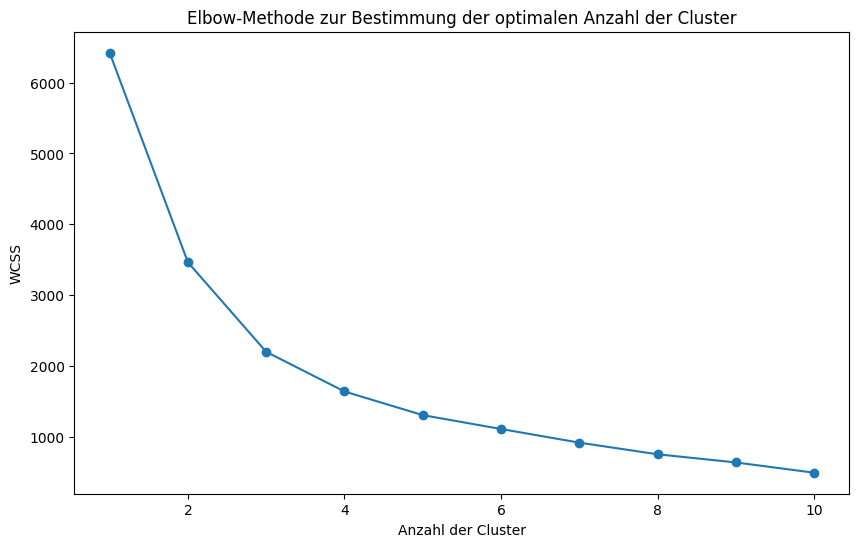

In [ ]:
# Bestimmung der optimalen Anzahl der Cluster mit der Elbow-Methode
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot der Elbow-Methode
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Anzahl der Cluster')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS')
plt.show()


**Bestimmung der optimalen Clusterzahl mit Hilfe eines Dendrogramms**

Auch das Dendrogramm bestätigt, dass 3 die optimale Anzahl an Clustern ist.

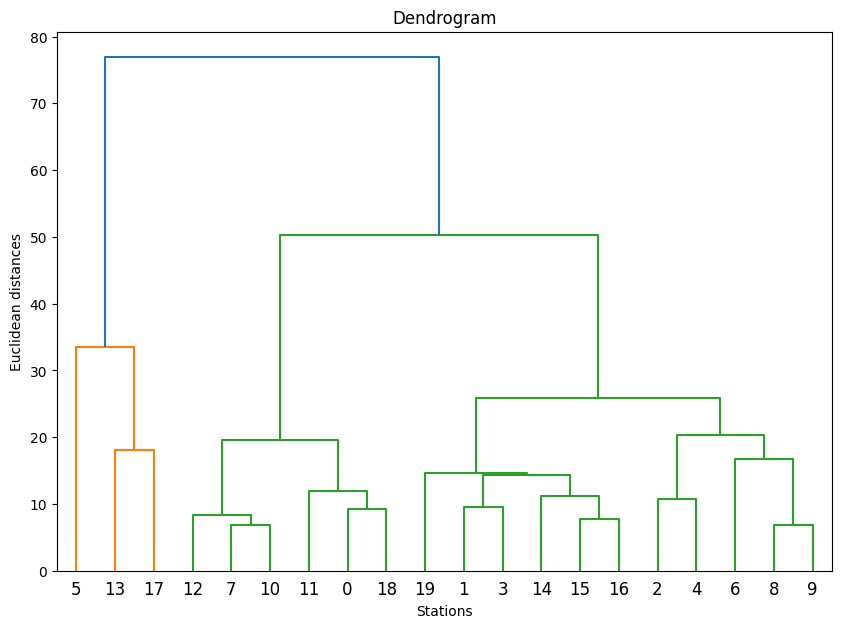

In [ ]:
# Erstellung des Dendrogramms
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(features_scaled_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Stations')
plt.ylabel('Euclidean distances')
plt.show()

# Durchführung der Clusteranalyse und Berechnung der Clusterzentren

**Durchführung der Clusteranalyse mit k-Means**

Die Clusteranalyse wurde mithilfe von kmeans durchgeführt. Als optimale Clusterzahl wurde gemäß der Elbow-Methode und des Dendrogramms 3 gewählt.

In [ ]:
# Durchführung der K-Means Analyse
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled_df)

# Clusterzugehörigkeit für jede Tankstelle
labels = kmeans.labels_




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Berechnung der Clusterzentren zur Interpretation**

In [ ]:
# Cluster-Zentroiden im normalisierten Raum
cluster_centers_normalized = kmeans.cluster_centers_

# Transformation der Cluster-Zentroiden zurück in die ursprünglichen Einheiten
cluster_centers_original = scaler.inverse_transform(cluster_centers_normalized)

# Erstellung eines DataFrames für die Cluster-Zentroiden in den ursprünglichen Einheiten
centroids_df = pd.DataFrame(cluster_centers_original, columns=features_df.columns)
centroids_df['cluster'] = [f'Cluster {i}' for i in range(3)]

# Ausgabe der Cluster-Zentroiden in den ursprünglichen Einheiten
print(centroids_df)

   ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
0                                           1.594873                     
1                                           1.635213                     
2                                           1.539710                     

   ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
0                                           1.594862                     
1                                           1.635186                     
2                                           1.538076                     

   ('diesel_avg_price_by_hour_in_Euro', '2_avg_price_by_hour_in_Euro')  \
0                                           1.594862                     
1                                           1.635082                     
2                                           1.532134                     

   ('diesel_avg_price_by_hour_in_Euro', '3_avg_price_by_hour_in_Euro')  \
0                                  

Zur einfacheren Überprüfung der Ergebnisse von Hand haben wir das DataFrame transponiert (um über 300 Spalten bei 3 Zeilen zu verhindern) und uns diese im Anschluss händisch als CSV-Datei angeschaut.

In [ ]:
# Transponieren des DataFrames, sodass die Metriken in den Zeilen und die Cluster in den Spalten stehen
centroids_transposed_df = centroids_df.transpose()

# Export des DataFrames als CSV mit Index
#centroids_transposed_df.to_csv('Clusterzentren.csv', index=True)
#files.download('Clusterzentren.csv')

print(centroids_transposed_df.head())

                                                           0         1  \
('diesel_avg_price_by_hour_in_Euro', '0_avg_pri...  1.594873  1.635213   
('diesel_avg_price_by_hour_in_Euro', '1_avg_pri...  1.594862  1.635186   
('diesel_avg_price_by_hour_in_Euro', '2_avg_pri...  1.594862  1.635082   
('diesel_avg_price_by_hour_in_Euro', '3_avg_pri...  1.594862  1.635082   
('diesel_avg_price_by_hour_in_Euro', '4_avg_pri...  1.594862  1.635075   

                                                           2  
('diesel_avg_price_by_hour_in_Euro', '0_avg_pri...   1.53971  
('diesel_avg_price_by_hour_in_Euro', '1_avg_pri...  1.538076  
('diesel_avg_price_by_hour_in_Euro', '2_avg_pri...  1.532134  
('diesel_avg_price_by_hour_in_Euro', '3_avg_pri...  1.532134  
('diesel_avg_price_by_hour_in_Euro', '4_avg_pri...  1.532134  


In [ ]:
print(centroids_df)

   ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
0                                           1.594873                     
1                                           1.635213                     
2                                           1.539710                     

   ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
0                                           1.594862                     
1                                           1.635186                     
2                                           1.538076                     

   ('diesel_avg_price_by_hour_in_Euro', '2_avg_price_by_hour_in_Euro')  \
0                                           1.594862                     
1                                           1.635082                     
2                                           1.532134                     

   ('diesel_avg_price_by_hour_in_Euro', '3_avg_price_by_hour_in_Euro')  \
0                                  

**Hierarchische Clusteranalyse**

Wir betrachten die k-Means-Analyse im weiteren Verlauf des Notebook als führende Clusteranalyse, deren Clusterzentren wir weiter beschreiben und interpretieren. Die hierarchische Clusteranalyse wurde zusätzlich zur Validierung der Ergebnisse durchgeführt und konnte diese Bestätigen. Im weiteren Verlauf werden diese Cluster jedoch nicht näher betrachtet.

In [ ]:
# Anzahl der Cluster (basierend auf Dendrogramm)
optimal_clusters = 3

# Durchführung der Agglomerativen Clusteranalyse
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
features_df['cluster_hc'] = hc.fit_predict(features_scaled_df)

# Ausgabe der Clusterzentren (Durchschnittswerte der Merkmale innerhalb der Cluster)
cluster_centers_hc = features_df.drop(columns='cluster_hc').groupby(features_df['cluster_hc']).mean()

print("Clusterzentren:")
print(cluster_centers_hc)

# Ausgabe der Clusterzugehörigkeit für jede Tankstelle
cluster_membership = features_df[['cluster_hc']]
print("Clusterzugehörigkeit:")
print(cluster_membership)

Clusterzentren:
            ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
cluster_hc                                                                        
0                                                    1.539710                     
1                                                    1.635213                     
2                                                    1.594873                     

            ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
cluster_hc                                                                        
0                                                    1.538076                     
1                                                    1.635186                     
2                                                    1.594862                     

            ('diesel_avg_price_by_hour_in_Euro', '2_avg_price_by_hour_in_Euro')  \
cluster_hc                                                           

# Vorbereitung der Visualisierung der Clusteranalyse

**Begründung für ein neues DataFrame**

Da die Spaltenbezeichnungen innerhalb der berechneten Clusterzentren durch lange Suffixe sehr unübersichtlich wurden (z.B: diesel_avg_price_by_hour_in_Euro), haben wir uns dazu entschlossen die Clusterzentren für die Visualisierung anhand der ursprünglichen Preisdaten nochmal neu zu berechnen. Dies erreichen wir, indem wir die Clusterzugehörigkeit mit dem DataFrame "merged_df" mergen.

Erstellen eines neuen Dataframe mit den Clusterzentren der Tankstellen

In [ ]:
# Erstellen eines DataFrames mit den Cluster-Zuweisungen
cluster_assignments = pd.DataFrame({
    'station_uuid': features_df.index,
    'cluster': labels
})

# Überprüfung der Cluster-Zuweisungen
print(cluster_assignments)


             station_uuid  cluster
0           Access_Calwer        0
1             Aral_Armsel        1
2    Aral_KaiserFriedrich        1
3         Aral_Karlsruher        1
4         Aral_Lochaecker        1
5               BFT_Haupt        2
6            ENI_Hirsauer        1
7          ENI_Karlsruher        0
8             Esso_Calwer        1
9    Esso_KaiserFriedrich        1
10         JET_Karlsruher        0
11             JET_Luisen        0
12   MastOehlert_Blaecher        0
13            SB_Eutinger        2
14        Shell_Buchbusch        1
15     Shell_Wilferdinger        1
16        Shell_Zerrenner        1
17         TP_Braetzingen        2
18  Tankcenter_Wurmberger        0
19        Total_Breslauer        1


Erstellen eines neuen Dataframes "merges_with_cluster" aus dem ursprünglichen DataFrame und den Clusterzuweisungen

In [ ]:
# Zusammenführen der Cluster-Zuweisungen mit den Originaldaten
merged_with_clusters = pd.merge(merged_df, cluster_assignments, on='station_uuid', how='left')

# Überprüfung der zusammengeführten Daten
print(merged_with_clusters)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-27 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-27 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-27 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-27 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-27 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-25 23:56:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864016 2024-06-25 23:57:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864017 2024-06-25 23:58:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864018 2024-06-25 23:59:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864019 2024-06-26 00:00:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   

        dieselchange  e5cha

# Visualisierungen und Beschreibungen der Clusteranalyse

**Durchschnittlicher Preis nach Stunde für jedes Cluster**



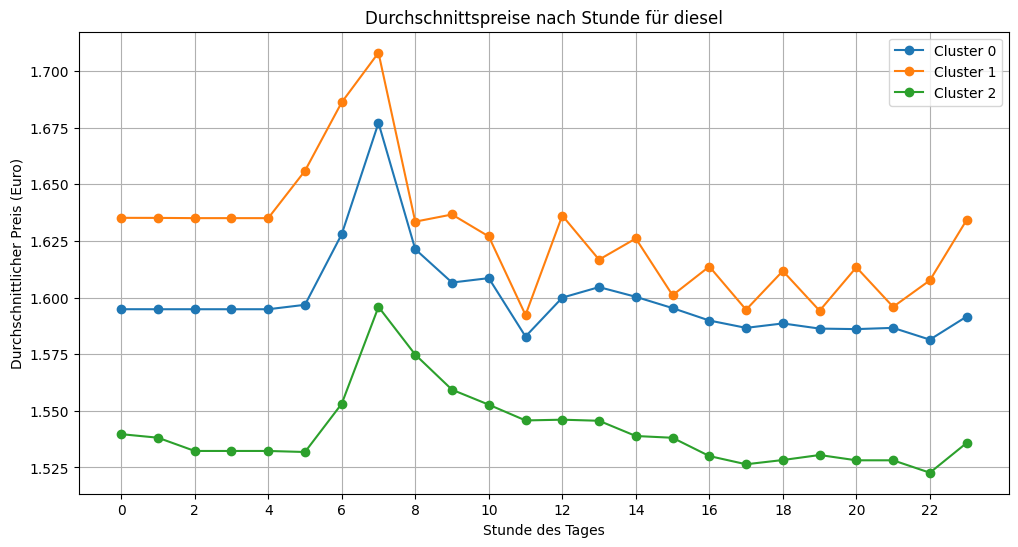

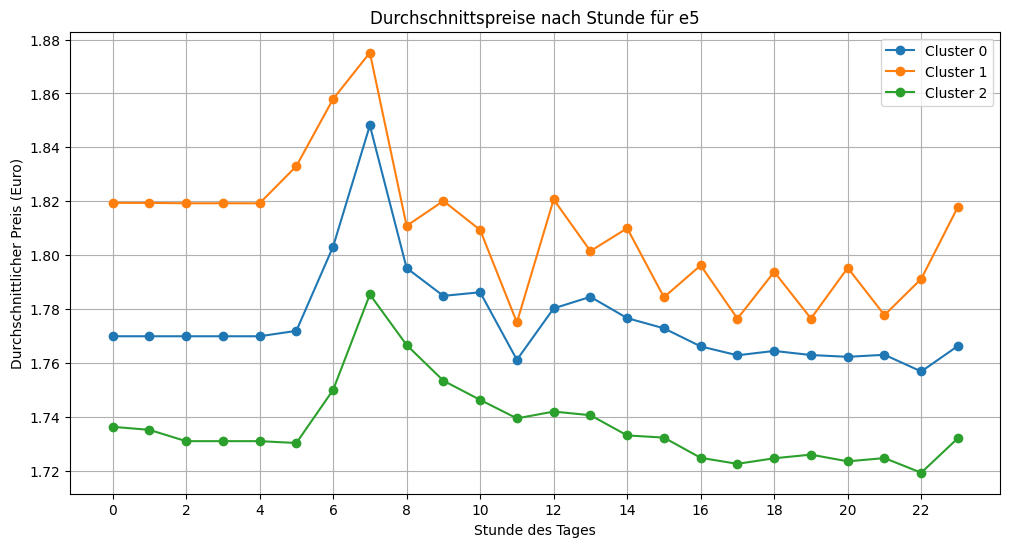

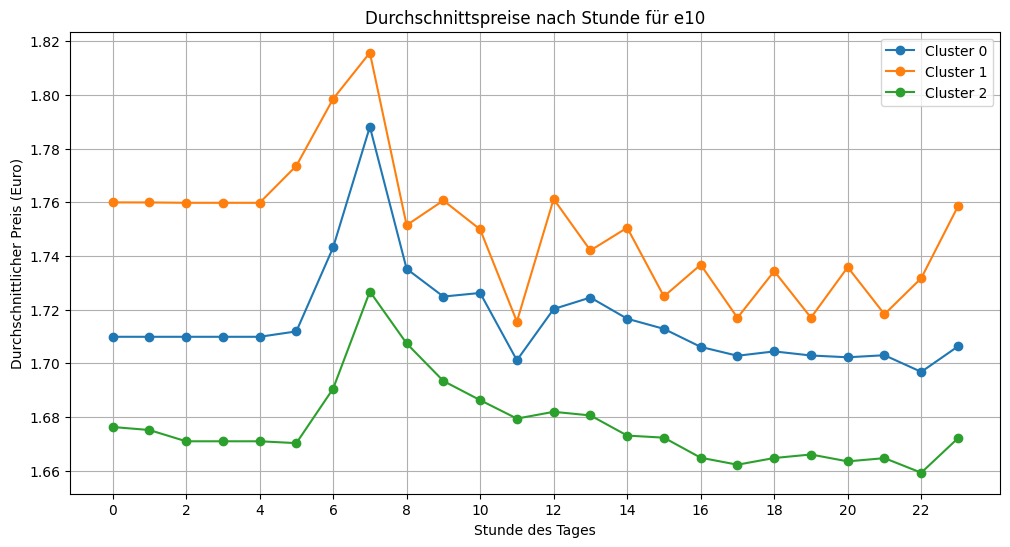

In [ ]:
# Berechnung der durchschnittlichen Preise nach Stunde und Cluster
avg_price_by_hour_cluster = merged_with_clusters.groupby(['cluster', 'hour'])[price_columns].mean().reset_index()

# Visualisierung der durchschnittlichen Preise nach Stunde für Diesel, E5 und E10 in jedem Cluster

for fuel in price_columns:
    plt.figure(figsize=(12, 6))
    for cluster in avg_price_by_hour_cluster['cluster'].unique():
        cluster_data = avg_price_by_hour_cluster[avg_price_by_hour_cluster['cluster'] == cluster]
        plt.plot(cluster_data['hour'], cluster_data[fuel], marker='o', label=f'Cluster {cluster}')

    plt.title(f'Durchschnittspreise nach Stunde für {fuel}')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Durchschnittlicher Preis (Euro)')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(0, 24, 2))  # Zeigt jede zweite Stunde auf der x-Achse
    plt.show()





**Interpretation und Beschreibung:**

Alle drei Kraftstoffarten weisen weitestgehend gleiche Muster auf. Cluster 1 hat klar die teuersten Preise, während Cluster 2 am günstigsten ist und Cluster 0 sich genau dazwischen befindet. In der Nacht sind die Preise in allen drei Clustern sehr konstant. In den Morgenstunden hat Cluster 0 von 5-7 Uhr den größten Anstieg, um die zusätzliche Nachfrage im Berufsverkehr bestmöglich zu nutzen. Um 8 Uhr beginnen alle drei Cluster die Preise zu senken, so dass um 11 Uhr in den Clustern 0 und 1 ein Preistief erreicht wird. Im Laufe des Nachmittags sinken die Preise in Cluster 0 und 2 moderat und ohne große Schwankungen, während in Cluster 1 die Preise sehr stark schwanken. Dies könnte darauf hindeuten, dass Cluster 1 im Nachmittags Berufsverkehr die Nachfragepeaks ebenfalls gezielt durch Preiserhöhungen ausnutzt. Von 22 auf 23 Uhr steigen die Preise in allen CLustern nochmal an, wobei Cluster 1 die Preise über die Nacht am deutlichsten erhöht.

**Durchschnittspreise nach Wochentag**

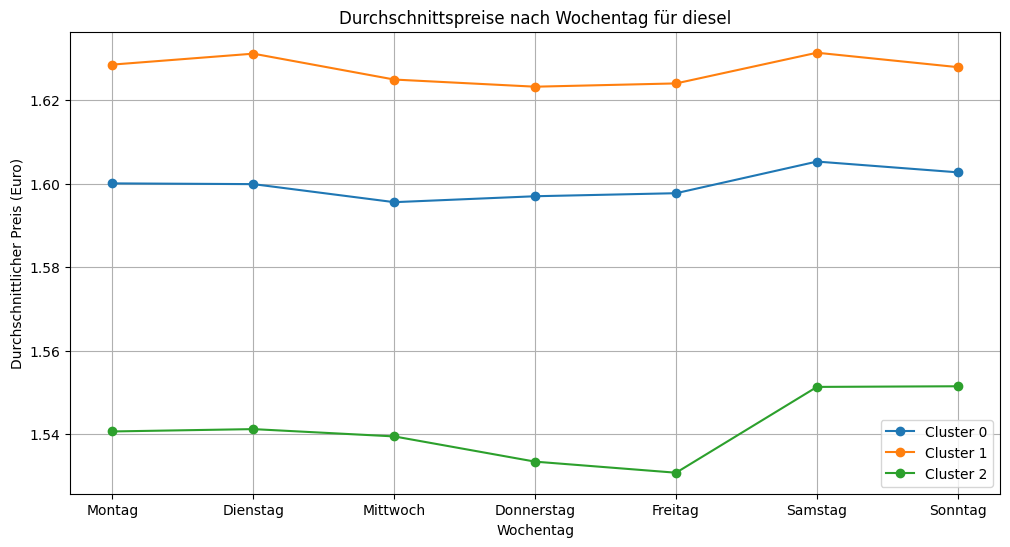

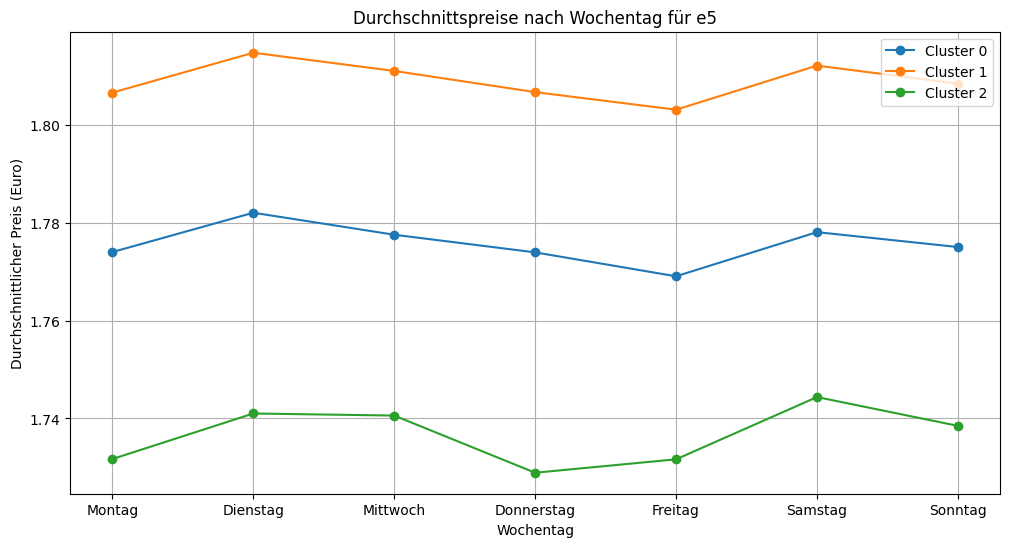

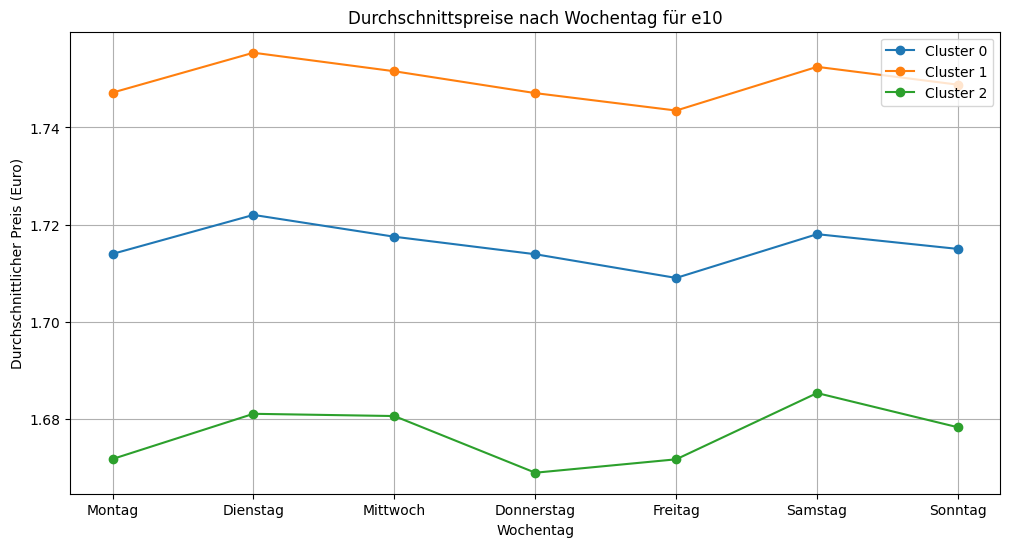

In [ ]:
# Berechnung der durchschnittlichen Preise nach Wochentag und Cluster
avg_price_by_weekday_cluster = merged_with_clusters.groupby(['cluster', 'weekday'])[price_columns].mean().reset_index()

# Visualisierung der durchschnittlichen Preise nach Wochentag für Diesel, E5 und E10 in jedem Cluster
# Wochentagsnamen für die x-Achse
weekday_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

for fuel in price_columns:
    plt.figure(figsize=(12, 6))
    for cluster in avg_price_by_weekday_cluster['cluster'].unique():
        cluster_data = avg_price_by_weekday_cluster[avg_price_by_weekday_cluster['cluster'] == cluster]
        plt.plot(cluster_data['weekday'], cluster_data[fuel], marker='o', label=f'Cluster {cluster}')

    plt.title(f'Durchschnittspreise nach Wochentag für {fuel}')
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittlicher Preis (Euro)')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(7), labels=weekday_names)  # Wochentagsnamen anzeigen
    plt.show()




**Beschreibung und Interpretation**

**Diesel Preise:**
Cluster 0 zeigt konstante, mittlere Preise über die Woche hinweg, mit einem leichten Abfall am Mittwoch und einem Anstieg am Samstag. Cluster 1 hat durchgehend höhere Preise, ebenfalls mit einem Anstieg zum Wochenende hin. Cluster 2 hat die niedrigsten Preise, die am Samstag und Sonntag am höchsten und freitags am niedrigsten sind. Insgesamt zeigen die Dieselpreise eine Tendenz zu höheren Preisen gegen Ende der Woche, besonders in Cluster 2.

**E5 Preise:**
Auch hier sind die Preise in Cluster 1 durchgehend am höchsten, mit einem besonders markanten Anstieg am Samstag. Cluster 0 zeigt relativ stabile Preise, die am Dienstag leicht ansteigen und bis Freitag wieder sinken. Cluster 2 hat die niedrigsten Preise, die am Samstag am höchsten und am Donnerstag am niedrigsten sind.

**E10 Preise:**
Hier zeigt sich ein ähnliches Muster wie bei E5, wobei Cluster 1 durchgehend die höchsten Preise aufweist, die am Dienstag ihren Höhepunkt erreichen. Cluster 0 zeigt relativ stabile Preise, die von Mittwoch bis Freitag leicht sinken. Cluster 2 hat die niedrigsten Preise, die am Samstag am höchsten und am Donnerstag am niedrigsten sind. Auch hier sind die Preisunterschiede zwischen den Clustern deutlich, die Preisverläufe zwischen Cluster 0 und 1 sind jedoch nahezu identisch.



 **Durchschnittliche Höhe der Preisänderungen**

   cluster  avg_diesel_increase  avg_diesel_decrease  avg_e5_increase  \
0        0             0.041855            -0.022036         0.040688   
1        1             0.051118            -0.031351         0.049656   
2        2             0.035397            -0.022112         0.033376   

   avg_e5_decrease  avg_e10_increase  avg_e10_decrease  
0        -0.021321          0.040688         -0.021321  
1        -0.029319          0.049656         -0.029323  
2        -0.020295          0.033344         -0.020296  


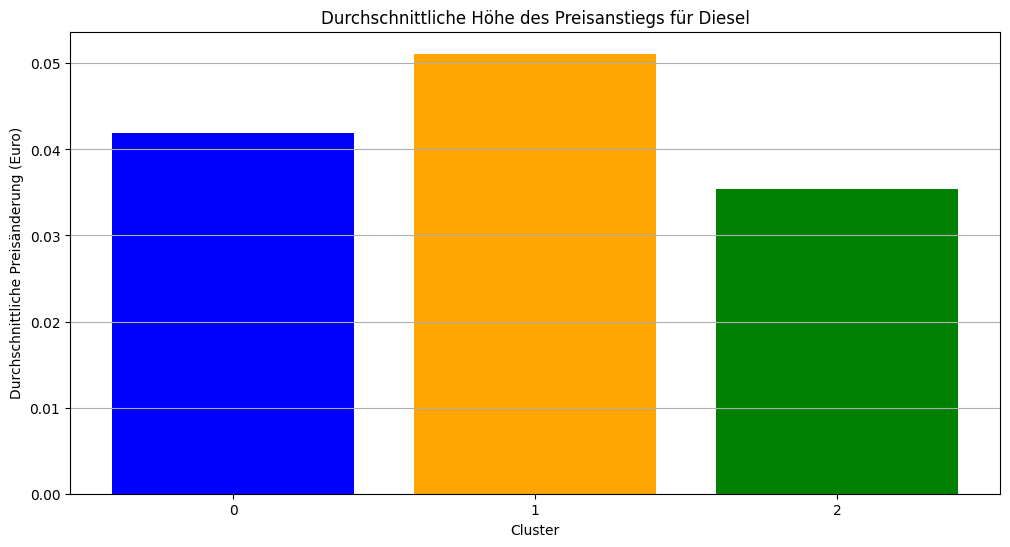

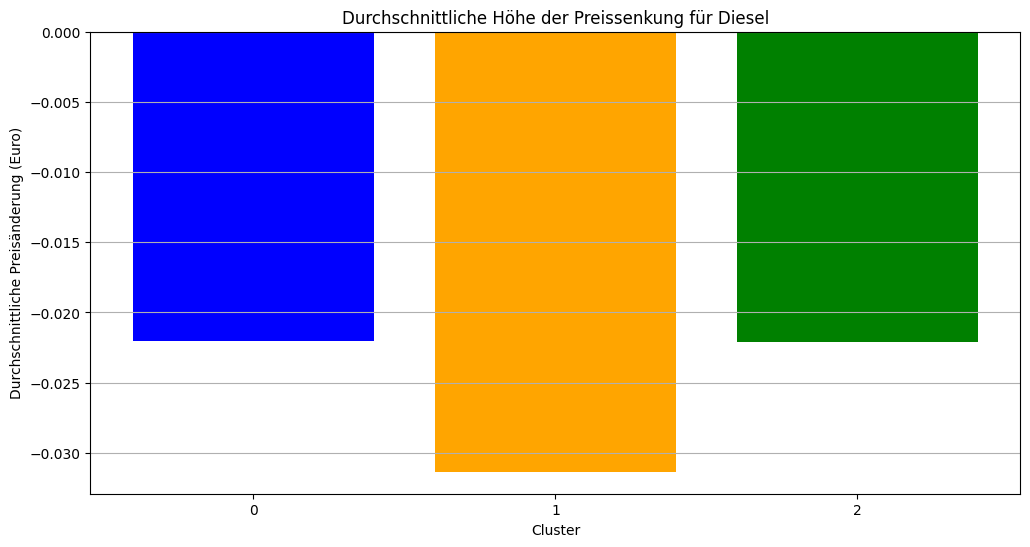

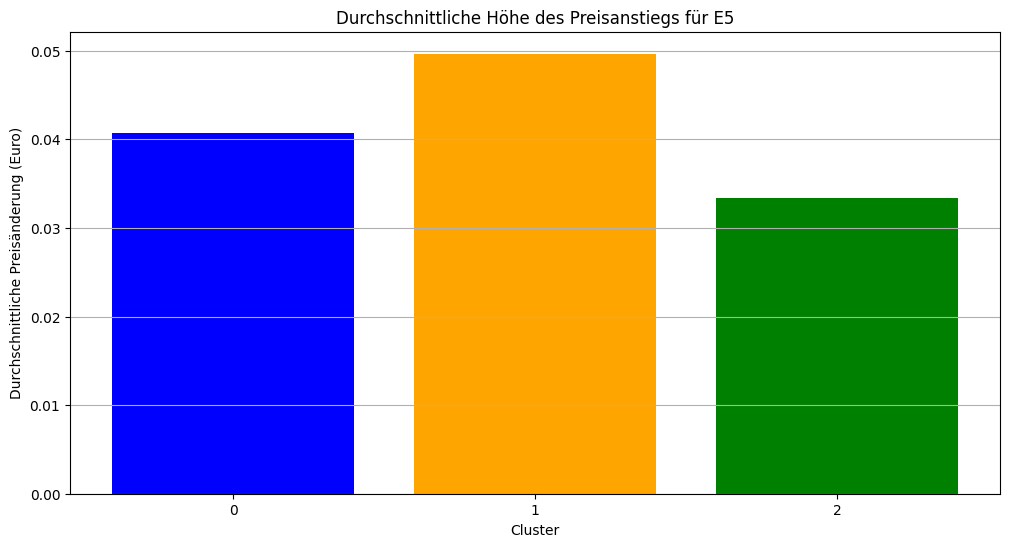

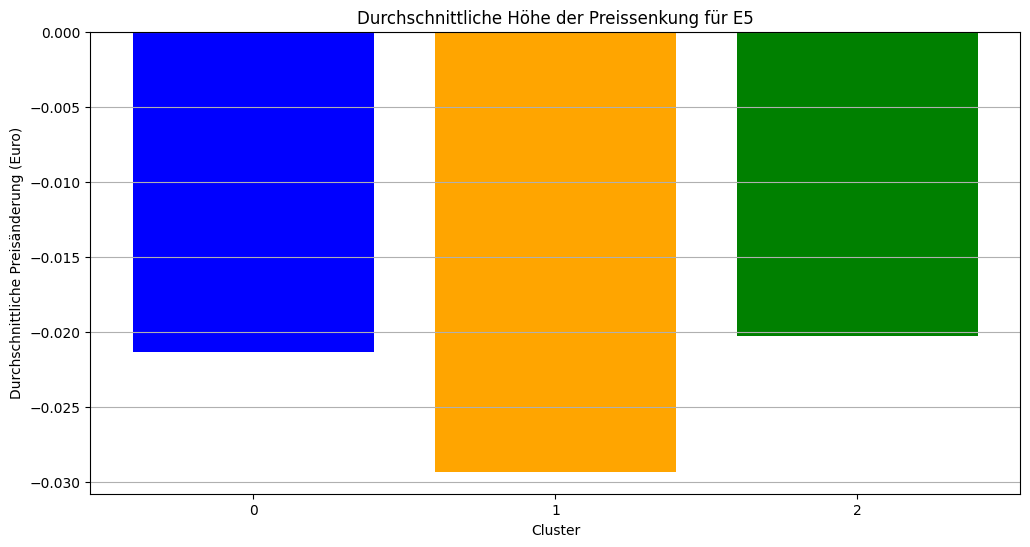

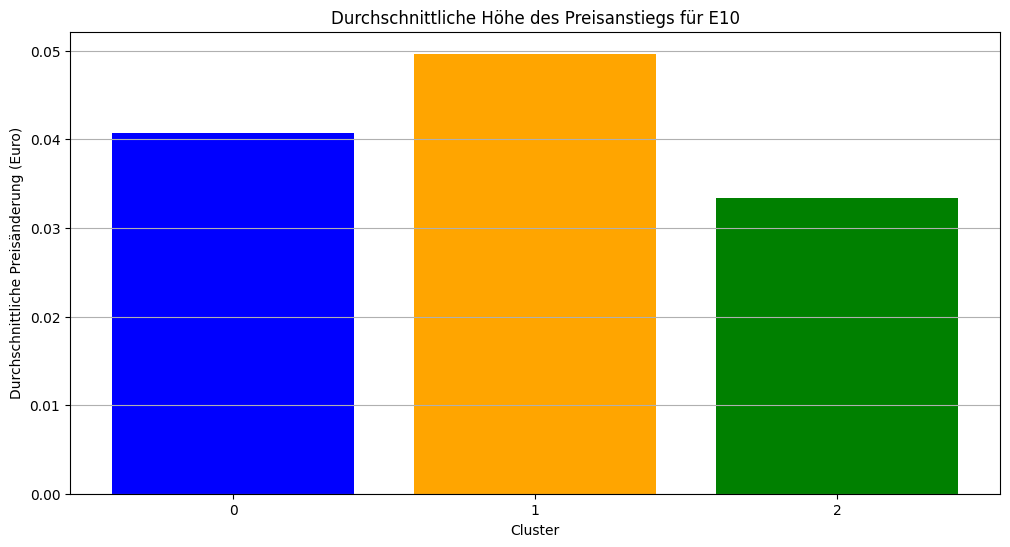

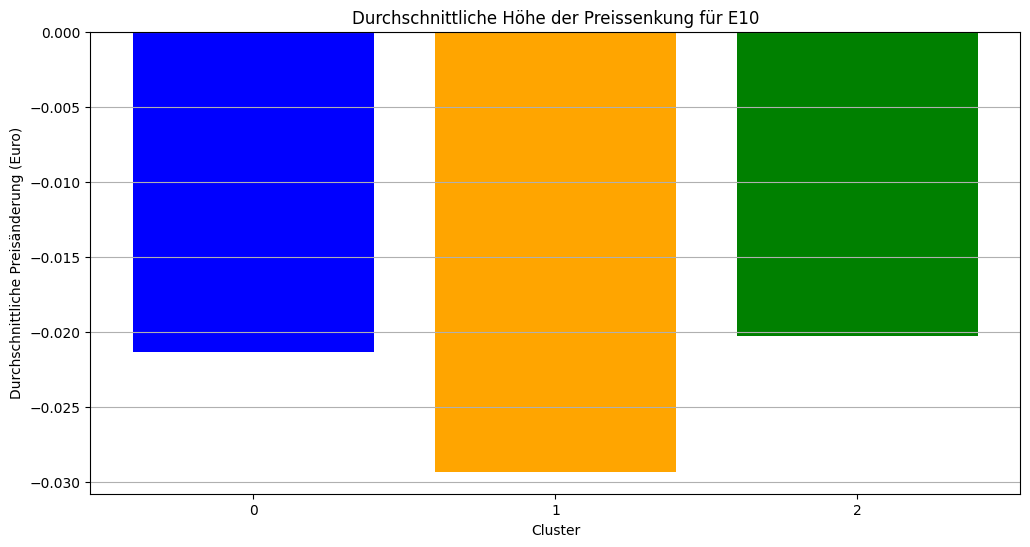

In [ ]:
# Berechnung der durchschnittlichen Höhe der Erhöhungen und Senkungen pro Cluster
avg_increase_decrease_cluster = merged_with_clusters.groupby('cluster').apply(
    lambda df: pd.Series({
        'avg_diesel_increase': df.loc[df['diesel_change_value'] > 0, 'diesel_change_value'].mean(),
        'avg_diesel_decrease': df.loc[df['diesel_change_value'] < 0, 'diesel_change_value'].mean(),
        'avg_e5_increase': df.loc[df['e5_change_value'] > 0, 'e5_change_value'].mean(),
        'avg_e5_decrease': df.loc[df['e5_change_value'] < 0, 'e5_change_value'].mean(),
        'avg_e10_increase': df.loc[df['e10_change_value'] > 0, 'e10_change_value'].mean(),
        'avg_e10_decrease': df.loc[df['e10_change_value'] < 0, 'e10_change_value'].mean()
    })
).reset_index()

# Überprüfung der Daten
print(avg_increase_decrease_cluster)

# Visualisierung der durchschnittlichen Höhe der Preisänderungen für Diesel, E5 und E10 in jedem Cluster
change_types = {
    'avg_diesel_increase': 'Durchschnittliche Höhe des Preisanstiegs für Diesel',
    'avg_diesel_decrease': 'Durchschnittliche Höhe der Preissenkung für Diesel',
    'avg_e5_increase': 'Durchschnittliche Höhe des Preisanstiegs für E5',
    'avg_e5_decrease': 'Durchschnittliche Höhe der Preissenkung für E5',
    'avg_e10_increase': 'Durchschnittliche Höhe des Preisanstiegs für E10',
    'avg_e10_decrease': 'Durchschnittliche Höhe der Preissenkung für E10'
}

for change_type, title in change_types.items():
    plt.figure(figsize=(12, 6))
    plt.bar(avg_increase_decrease_cluster['cluster'], avg_increase_decrease_cluster[change_type], color=['blue', 'orange', 'green'])
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Durchschnittliche Preisänderung (Euro)')
    plt.xticks(avg_increase_decrease_cluster['cluster'])
    plt.grid(True, axis='y')
    plt.show()


**Beschreibung und Interpretation:**

Cluster 1 hat bei allen Kraftstoffarten die höchsten durchschnittlichen Preisanstiege und Preissenkungen, was auf eine aggressive Preisstrategie hinweist. Diese Tankstellen könnten häufige und signifikante Preisänderungen nutzen, um Kunden anzulocken und die Nachfrage zu steuern. Im Gegensatz dazu haben die Tankstellen in Cluster 2 die niedrigsten Preisänderungen, was auf eine stabilere Preisstrategie hinweist, die darauf abzielt, eine verlässliche Preiswahrnehmung zu schaffen. Cluster 0 zeigt moderate Preisänderungen und verfolgt somit eine ausgeglichene Strategie zwischen den Extremen der anderen beiden Cluster.

**Erneute Ausgabe der Clusterzugerhörigkeit zur Vorbereitung der Auswahl der Wettbewerber**

In [ ]:
# Ausgabe der Cluster-Zuweisungen
print(cluster_assignments)

             station_uuid  cluster
0           Access_Calwer        0
1             Aral_Armsel        1
2    Aral_KaiserFriedrich        1
3         Aral_Karlsruher        1
4         Aral_Lochaecker        1
5               BFT_Haupt        2
6            ENI_Hirsauer        1
7          ENI_Karlsruher        0
8             Esso_Calwer        1
9    Esso_KaiserFriedrich        1
10         JET_Karlsruher        0
11             JET_Luisen        0
12   MastOehlert_Blaecher        0
13            SB_Eutinger        2
14        Shell_Buchbusch        1
15     Shell_Wilferdinger        1
16        Shell_Zerrenner        1
17         TP_Braetzingen        2
18  Tankcenter_Wurmberger        0
19        Total_Breslauer        1


# Auswahl und Beschreibung der direkten Wettbewerber auf Basis der Clusteranalyse und geografischen Faktoren

## Einbezug der Clusteranalyse

Die Auswahl der direkten Wettbewerber erfolgt anhand der Ergebnisse aus der Clusteranalyse sowie der geografischen Lage innerhalb orzheimorzheims.

Die von uns ausgewählte Tankstelle "Aral_Lochaecker" wurde Cluster 1 zugeordnet. In diesem Cluster befinden sich folgende zehn Wettbewerber, die ähnliche Preisstrategien aufweisen und daher zum erweiterten Wettbewerbskreis zu zählen sind (stand: 25.06.2024):

* Aral_Armsel
* Aral_KaiserFriedrich
* Aral_Karlsruher
* ENI_Hirsauer
* Esso_Calwer
* Esso_KaiserFriedrich
* Shell_Buchbusch
* Shell_Wilferdinger
* Shell_Zerrenner
* Total_Breslauer

## Einbezug der Lage

Als zusätzlichen Faktor zur Auswahl der Konkurrenten nutzen wir die Lage der Tankstellen die ebenfalls großen Einfluss auf die Preisstrategie haben kann. Daher haben wir uns auf Tankstellen konzentriert, die eine ähnliche geografische Lage wie die Aral Tankstelle in der Lochäcker Straße haben.

Die Lage der Aral Lochäcker lässt sich folgendermaßen beschreiben:

* An einer großen Bundesstraße (B294)
* Nahe der Autobahnauffart (Pforzheim-Ost)
* Außerhalb der Innenstadt
* Im Gewerbegebiet mit sehr dichter Bebauung gelegen
* Cluster: 1

Als Wettbewerber haben wir zwei Tankstellen identifiziert, die ähnliche Lageparameter aufweisen. Nachfolgend werden die Wettbewerber, ihre geografische Lage sowie ihr Cluster aufgeführt:

Shell_Buchbusch:
* An einer großen Bundesstraße (B294)
* Nahe der Autobahnauffart (Pforzheim-Ost, nur auf der anderen Seite der A8 als die Aral_Lochäcker)
* Außerhalb der Innenstadt
* Im Gewerbegebiet mit minimaler Bebauung gelegen
* Cluster: 1

Aral_Karlsruher:
* An einer großen Bundesstraße (B10)
* Nahe der Autobahnauffart (Pforzheim-West)
* Außerhalb der Innenstadt
* Im Gewerbegebiet gelegen
* Cluster: 1

Somit haben wir insgesamt anhand der Cluster und der Lage  Wettbewerber identifiziert. Die Shell Tankstelle soll hierbei als Hauptkonkurrent angesehen werden, gegen den unsere Tankstelle sich durchsetzen muss. Die Aral an der Karlsruher Straße haben wir ausgewählt, um zu analysieren ob es Parallelen in der Preisgestaltung innerhalb des selben Mineralölkonzerns gibt. Da sie, wie beschrieben, relativ ähnliche Lageparameter hat, halten wir die Tankstelle für ein gutes Vergleichsobjekt für weitere Erkenntnisse.

## Detaillierte Beschreibungen der Aral Lochäcker sowie der Konkurrenten

Neben der Lage lassen sich die drei Tankstellen durch weitere Faktoren beschreiben, die nachfolgend aufgeführt werden.

**Aral Lochäcker:** (vgl. https://tankstelle.aral.de/orzheimorzheim/lochaeckerstrasse-b-294/18122700)

Öffnungszeiten: 24/7

Services:
* Ladesäulen
* Rewe to Go
* Aral Store
* Recup orzheimandbecher
* Too Good To Go
* Payback
* Payback Fuel&Go (an der Säule Zahlen und Punkte sammeln)
* Waschanlage inkl. Cabrioorzheimlege
* Geldautomat
* Flotten-/Tankkarte
* Autogas

**Shell Buchbusch:** (vgl. https://find.shell.com/de/fuel/12094345-orzheimorzheim-im-buchbusch-12/de_DE#offers-anchor)

Öffnungszeiten: 24/7

Services:
* Backshop
* Café
* Shell ClubSmart (Punkteprogramm)
* WC
* Shell Smart Pay
* Smart Pay (Google, Apple, Amex, Mastercard etc.)
* Parkplatz
* An der Säule bezahlen
* Amazon Locker
* WiFi
* Staubsauger
* Reifendruckluft
* Bankautomat

**Aral Karlsruher:** (vgl. https://tankstelle.aral.de/orzheimorzheim/karlsruher-strasse-26a/15118000)

Öffnungszeiten: 24/7

Services:
* Rewe to Go
* Aral Store
* Recup orzheimandbecher
* Too Good To Go
* Payback
* Payback Fuel&Go (an der Säule Zahlen und Punkte sammeln)
* Waschanlage inkl. Cabrioorzheimlege
* Geldautomat
* Flotten-/Tankkarte
* Autogas

Insgesamt kann festgehalten werden, dass alle drei Tankstellen ähnlich gut ausgestattet und rund um die Uhr geöffnet sind. Alleinstellungsmerkmal der Aral Lochäcker sind die E-Ladesäulen. Die Shell-Tankstelle nennt noch die Amazon Locker und modernste Zahlungsmöglichkeiten wie Google- und Apple Pay. Die Aral Tankstellen verfügen beide über eine Partnerschaft mit Rewe und bieten so eine deutlich größere Lebensmittelauswahl als der Backshop der Shell-Tankstelle. Dies könnte besonders an Sonntagen und nachts, wenn normale Supermärkte geschlossen haben, ein entscheidender Wettbewerbsvorteil sein, durch den zu diesen Zeiten erhöhte Spritpreise durchsetzbar wären.



**Erstellen eines neuen DataFrames auf Basis der Wettbewerberauswahl für die folgenden Zeitreihenplots und deskriptiven Statistiken**

In [ ]:
# Filtern der Daten für die drei betrachteten Tankstellen
aral_shell_df = merged_df[merged_df['station_uuid'].isin(['Aral_Lochaecker', 'Shell_Buchbusch', 'Aral_Karlsruher'])]

# Speichern der gefilterten Daten als CSV-Datei
#aral_shell_df.to_csv('aral_shell_df.csv', index=True)

# Überprüfung der ersten Zeilen des gefilterten DataFrames
print(aral_shell_df.head())


                            date     station_uuid  diesel  e5  e10  \
129603 2024-05-27 00:00:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129604 2024-05-27 00:01:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129605 2024-05-27 00:02:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129606 2024-05-27 00:03:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129607 2024-05-27 00:04:00+02:00  Aral_Karlsruher     NaN NaN  NaN   

        dieselchange  e5change  e10change  hour  weekday  ...  \
129603           NaN       NaN        NaN     0        0  ...   
129604           NaN       NaN        NaN     0        0  ...   
129605           NaN       NaN        NaN     0        0  ...   
129606           NaN       NaN        NaN     0        0  ...   
129607           NaN       NaN        NaN     0        0  ...   

        time_since_last_change_diesel  time_since_last_change_e5  \
129603                            NaN                        NaN   
129604                            NaN               

# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (gesamter Betrachtungszeitraum)

<ipython-input-40-d836b13e38f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


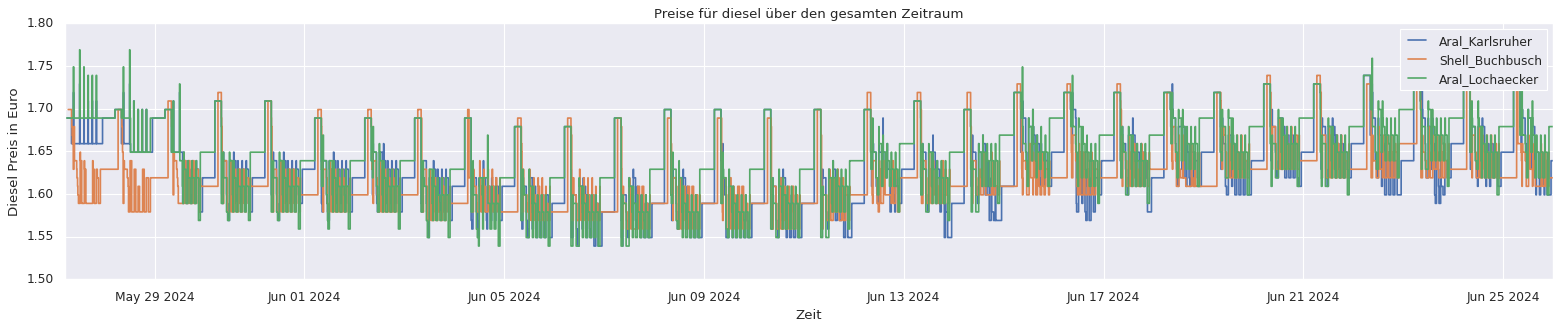

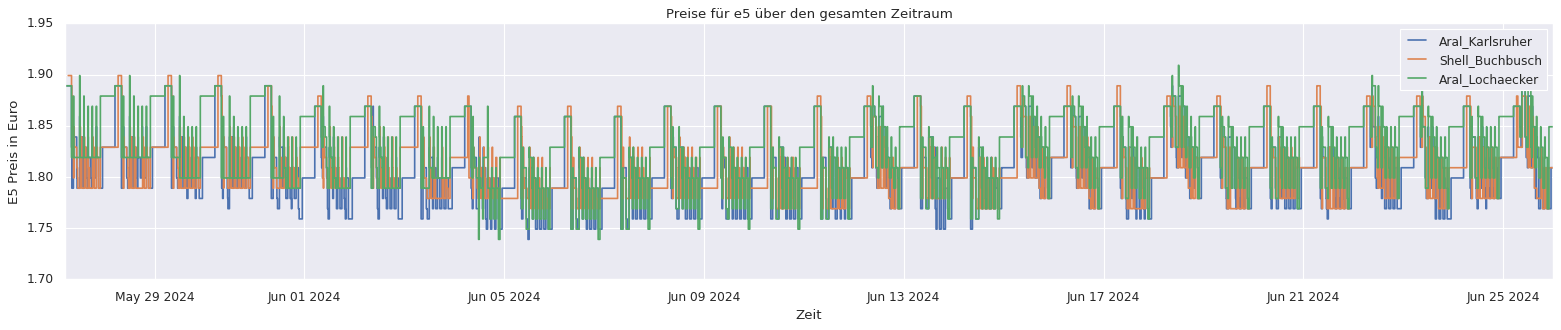

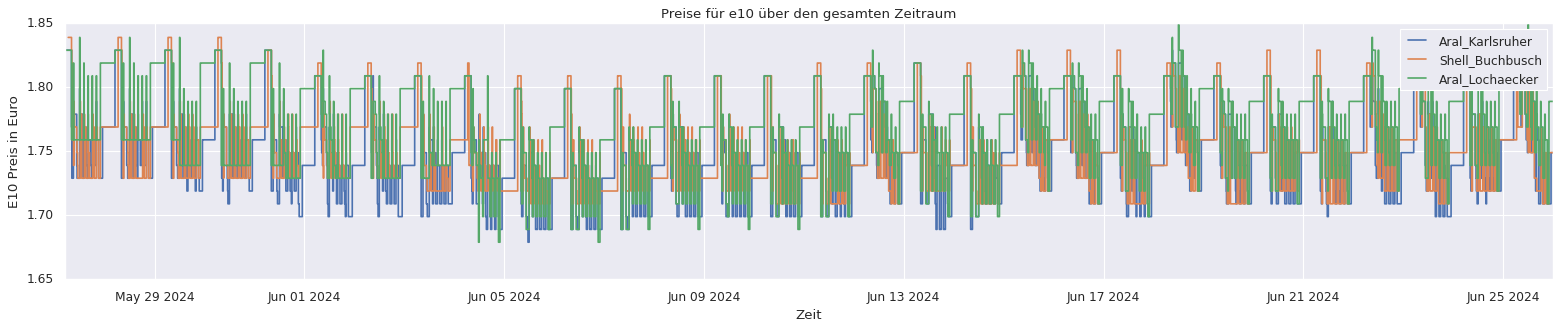

In [ ]:
# Konvertierung der 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filterung der Daten für die aktuelle Tankstelle
        df = aral_shell_df[aral_shell_df['station_uuid'] == station_id]

        # Erstellen eines Plots
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Hinzufügen von Titel und Labels
    plt.title(f'Preise für {fuel} über den gesamten Zeitraum')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Ausgabe des Plot
    plt.show()


#Interpretationen der Durchschnittspreise für jede Tankstelle über alle drei Kraftstoffarten im gesamte Betrachtungszeitraum


Am 29. Mai haben beide Aral Tankstellen die Dieselpreise deutlich auf das Preisniveau der Shell Tankstelle gesenkt, für die Kraftstoffe E5 und E10 galt das nicht. Das Schaubild lässt vermuten, dass nachts die Preise konstant gehalten werden. Hierbei ist die Aral_Lochaecker bei allen Kraftstoffarten am teuersten und scheint das höchste Preisniveau zu haben. Aral_Karlsruher und Shell_Buchbusch bewegen sich auf einem ähnlichen Preisniveau.
Es fällt auf, dass es bei allen drei Tankstellen große Spitzen nach oben gibt, die vermutlich am Morgen geschehen. Hierbei fällt auf, dass die Preisspitzen in den meisten Fällen von den Aral Tankstellen initiiert werden und von der Shell_Buchbusch übertroffen werden, bevor die Preise wieder fallen. Die Preise sind gegen Ende des Tages eher abfallend, bevor Sie zur Nacht hin wieder steigen.
Um tiefere Erkenntnisse zu bekommen, schauen wir uns im nächsten Schritt die Preise über der von uns ausgewählte Kalenderwoche 25 (17.06.2024 – 23.06.2024) an, da die Preismuster sich täglich zu wiederholen scheinen.


# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (für eine Woche im Betrachtungszeitraum)


**Plot für eine bestimmte Woche**

<ipython-input-41-ed4e12a8b42f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


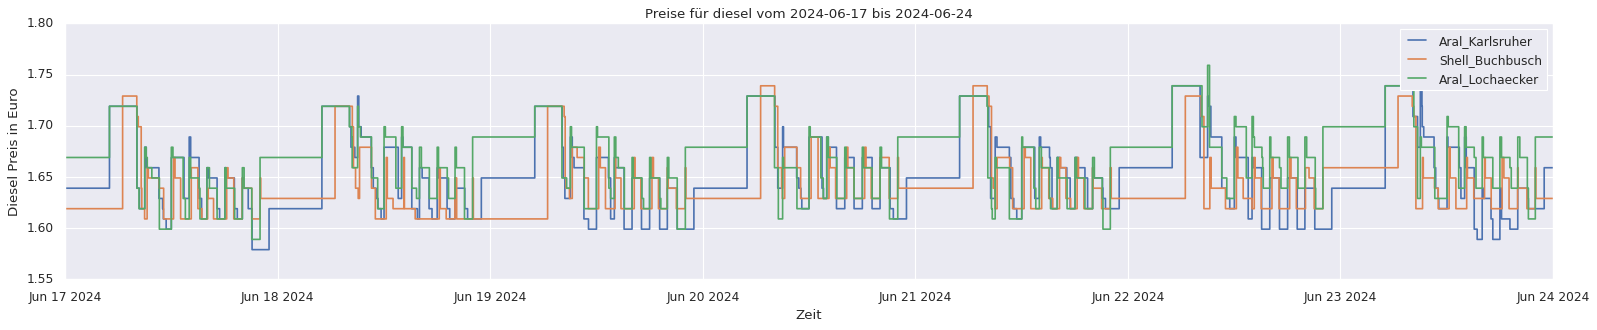

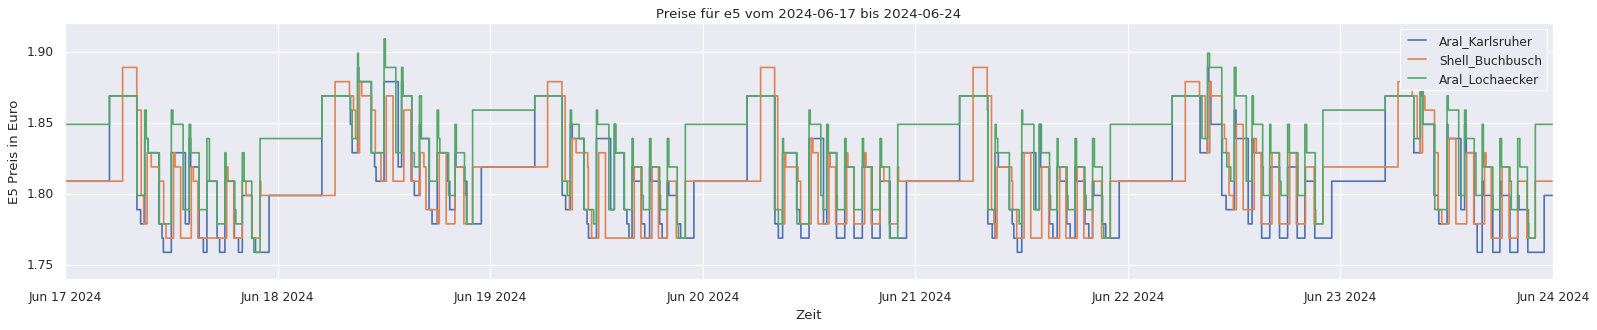

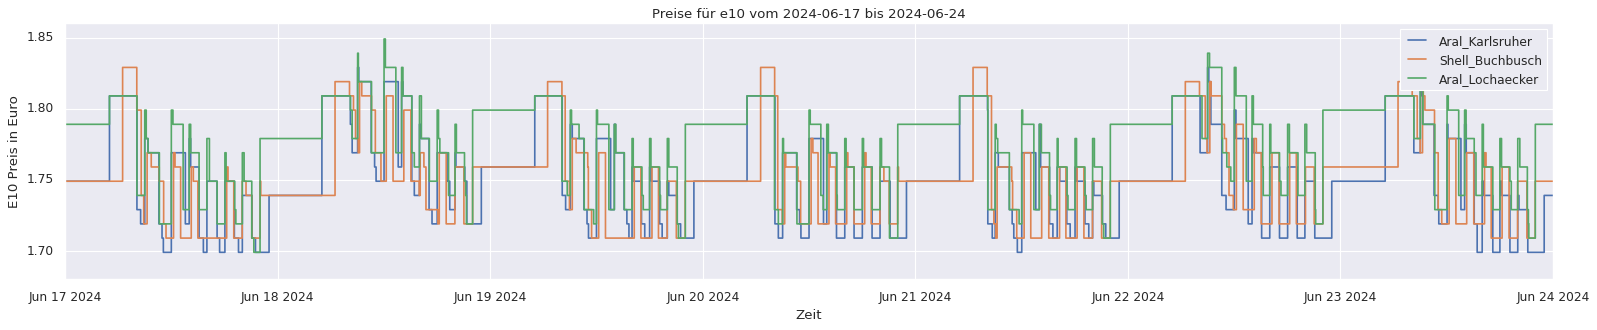

In [ ]:
# Konvertierung der 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimmung des Zeitraums (hier für eine Woche)
start_date = '2024-06-17'
end_date = '2024-06-24'

# Filterung der Daten für die angegebene Woche
week_data = aral_shell_df[(aral_shell_df['date'] >= start_date) & (aral_shell_df['date'] <= end_date)]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filterung der Daten für die aktuelle Tankstelle und die Woche
        df = week_data[week_data['station_uuid'] == station_id]

        # Erstellung des Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} vom {start_date} bis {end_date}')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Ausgabe des Plot
    plt.show()

#Interpretationen der Durchschnittspreise für jede Tankstelle über alle drei Kraftstoffarten hinweg in KW25 (17.06.2024 – 23.06.2024):

In der Wochenansicht fällt auf, dass sich die Vermutung mit dem konstanten Preisniveau bei Nacht bestätigt. Aral_Karlsruher & Shell_Buchbusch weisen dabei deutlich niedrigere Preise auf als Aral_Lochaecker. Zudem bewegen sich Shell_Buchbusch und Aral_Karlsruher nachts auf einem ähnlichen Preisniveau. Bei den Kraftstoffen E5 und E10 sind sie sogar in 5 der 7 Tage genau gleich.
Ebenso scheint es, als würden die beiden Aral Tankstellen die Preise zeitgleich morgens um dieselbe Uhrzeit erhöhen.  Die Shell_Buchbusch zieht zeitlich verzögert nach und übertrifft die Preise der beiden Aral-Tankstellen sogar für einen kurzen Zeitabschnitt. Anschließend fallen die Preise bei allen drei zunächst ab. Unsere Tankstelle hat über den Vormittag über alle Kraftstoffe hinweg des Öfteren Preisspitzen, die insbesondere bei der Shell ausbleiben. Dies betrifft vor allem den Dienstag und Samstag.
Ebenfalls auffällig ist, dass die Shell_Buchbusch und Aral_Karlsruher die Preise gegen Nachmittag eher konstant zu halten scheinen, die Aral_Lochaecker hingegen wieder starke und kurze Preisspitzen erreicht.
Die oben aufgestellte Vermutung, dass die Aral_Lochaecker durch den Standort und Servicevorteil (Rewe ToGo) nachts höhere Preise durchsetzen kann, bestätigt sich in diesen Daten. Darüber hinaus lässt sich anhand der Daten schlussfolgern, dass besonders in den Morgenstunden die Aral_Lochaecker der Preisführer über alle Kraftstoffe hinweg ist. Die Shell_Buchbusch folgt den Ausschlägen punktuell, mit geringeren Schwankungen im Vergleich zu den anderen Tankstellen und agiert bei den Preisanstiegen überwiegend in der Rolle des Preisfolgers.


# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (für einen bestimmten Tag im Betrachtungszeitraum)

**Plot für einen bestimmten Tag**

<ipython-input-61-af079fa010e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


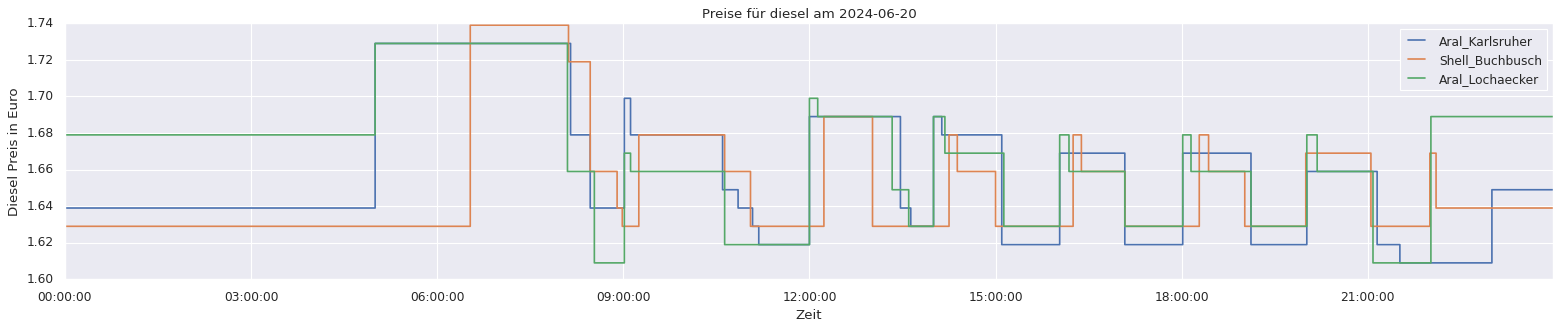

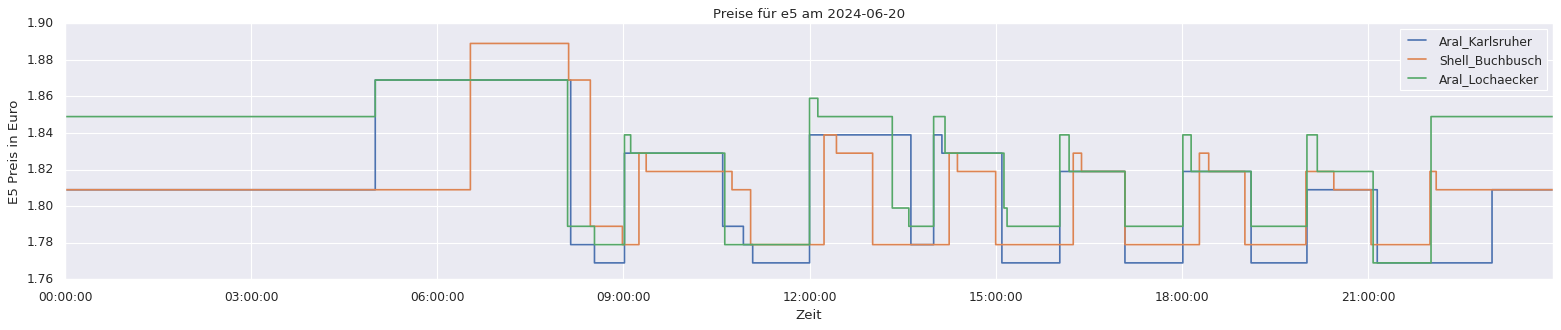

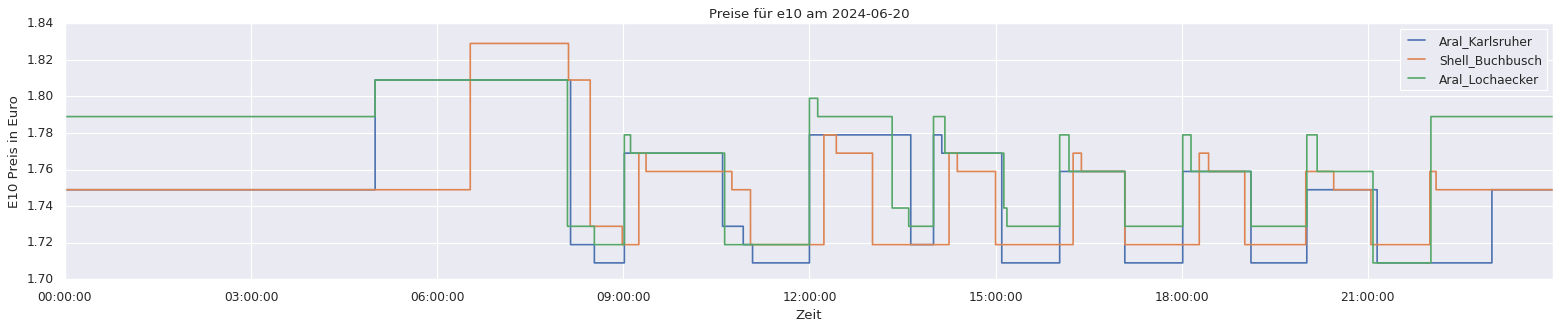

In [61]:
# Konvertierung der 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimmung des Datums
selected_date = '2024-06-20'

# Filterung der Daten für das angegebene Datum
day_data = aral_shell_df[aral_shell_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filterung der Daten für die aktuelle Tankstelle und den Tag
        df = day_data[day_data['station_uuid'] == station_id]

        # Erstellung des Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} am {selected_date}')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Ausgabe des Plot
    plt.show()

#Interpretationen der Tagesdurchschnittspreise für jede Tankstelle über alle drei Kraftstoffarten hinweg am 20.06.2024:

Die Preise der Aral_Lochaecker sind über die Nacht konstant hoch und beginnen ab 5 Uhr in den Morgenstunden anzusteigen, sinken tagsüber und steigen zur Nacht hin wieder an.  Die Preise der Aral_Karlsruher steigen wie bereits vermutet genau zur gleichen Zeit ab 5 Uhr auf den gleichen Preis wie die Aral_Lochaecker. Über die Nacht dagegen orientiert sich die Aral_Karlsruher an der Shell_Buchbusch und zieht den Preis vor 23:00 Uhr auf das gleiche Niveau. Die Shell_Buchbusch weist für alle drei Kraftstoffarten das konstanteste Preisniveau auf und reagiert auf die Preisanstiege der Aral Tankstellen um 5 Uhr mit dem höchsten absoluten Preis des Tages, bevor sie ab 9:00 Uhr bis auf zwei Ausnahmen immer unter dem Preis der Aral_Lochaecker liegt.

# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (Berufsverkehr eines Tages im Betrachtungszeitraum)

**Zeitreihenplot für den Berufsverkehr eines bestimmten Tages**

**Berufsverkehr Morgens**

<ipython-input-62-51b7f4e9173e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


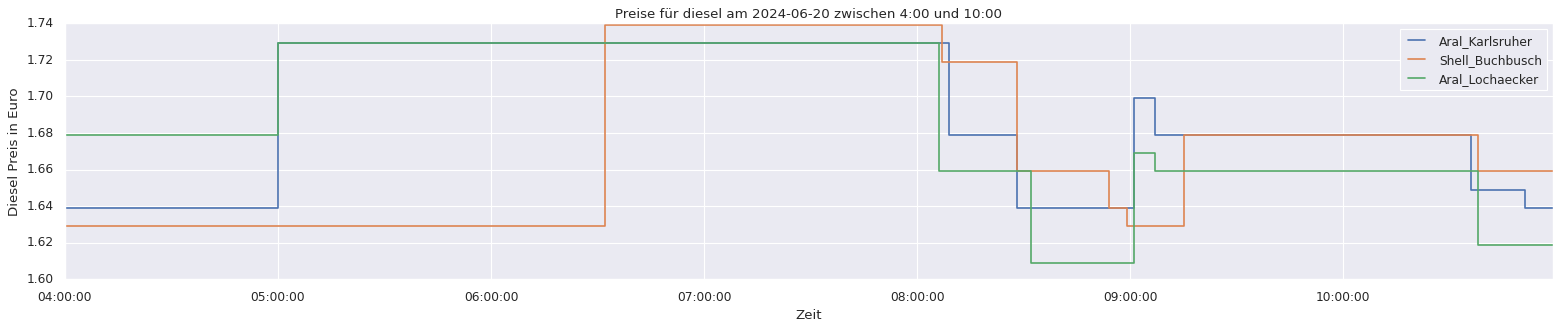

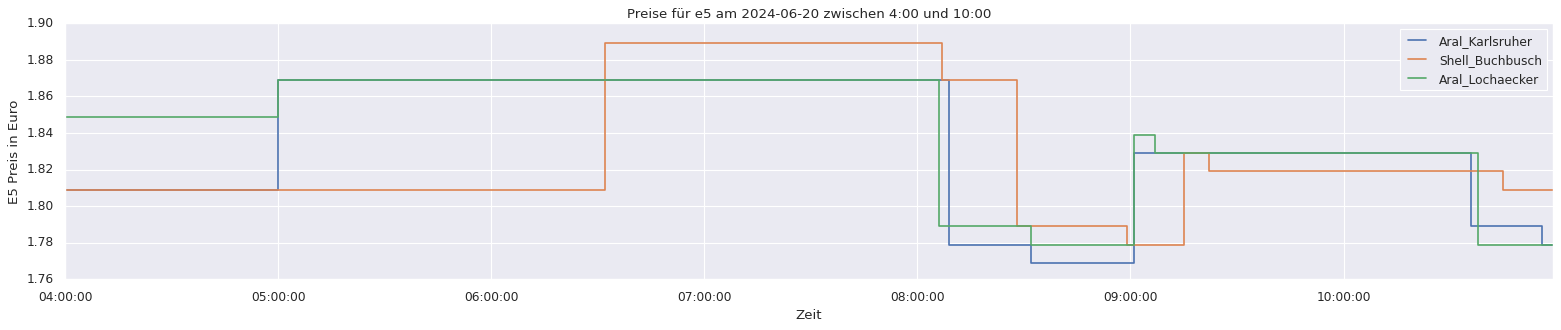

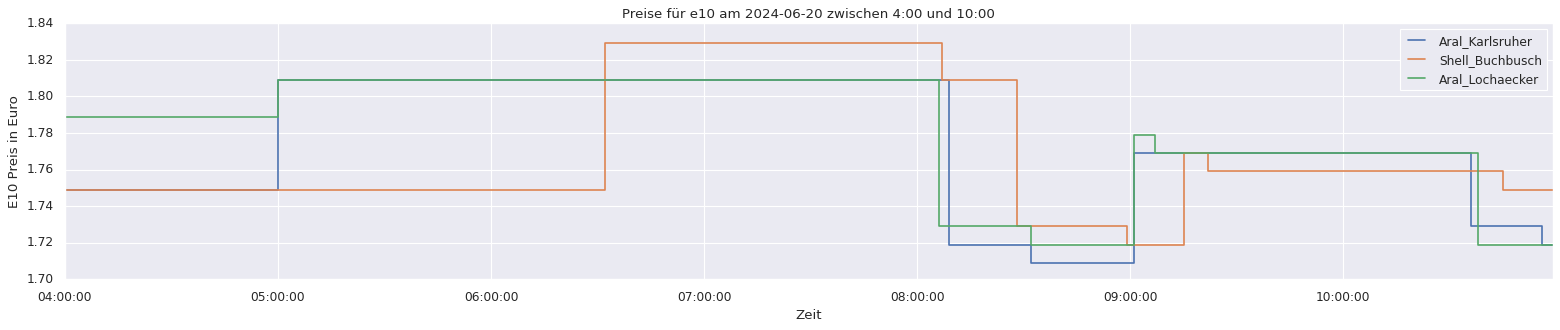

In [62]:
# Konvertierung der 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimmung des Datums und des Zeitrahmens
selected_date = '2024-06-20'
start_hour = 4
end_hour = 10

# Filterung der Daten für das angegebene Datum und den Zeitrahmen
day_data = aral_shell_df[
    (aral_shell_df['date'].dt.date == pd.to_datetime(selected_date).date()) &
    (aral_shell_df['date'].dt.hour >= start_hour) &
    (aral_shell_df['date'].dt.hour <= end_hour)
]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filterung der Daten für die aktuelle Tankstelle und den Tag
        df = day_data[day_data['station_uuid'] == station_id]

        # Erstellung des Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} am {selected_date} zwischen {start_hour}:00 und {end_hour}:00')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Ausgabe des Plot
    plt.show()

### Interpretation der Durchschnittspreise während des Berufsverkehrs am Morgen (4:00 bis 11:00 Uhr) für die drei Kraftstoffarten am 20.06.2024

Die Betrachtung der Durchschnittspreise währen des Berufsverkehr bestätigen erneut den Anstieg der beiden Aral Tankstellen um 5 Uhr, sowie den Preisanstieg der Shell gegen 7:30 Uhr. Auch in den folgenden Stunden zieht die Aral_Lochaecker den Preis wiederholt an und wird von der Shell und kurze Zeit danach nachgezogen. Lediglich beim Dieselpreis hat unsere Tankstelle den niedrigeren Preis.

**Berufsverkehr Abend**

<ipython-input-63-a652b24a3c9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


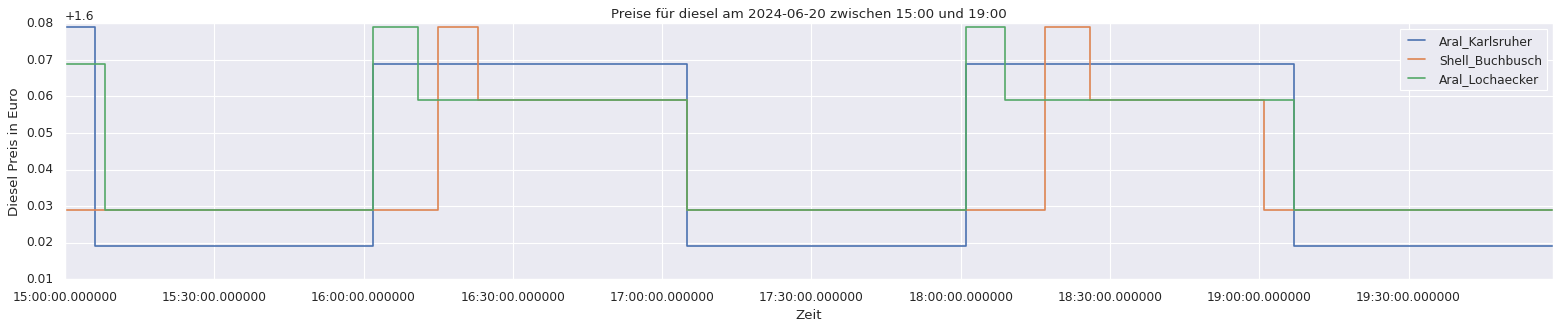

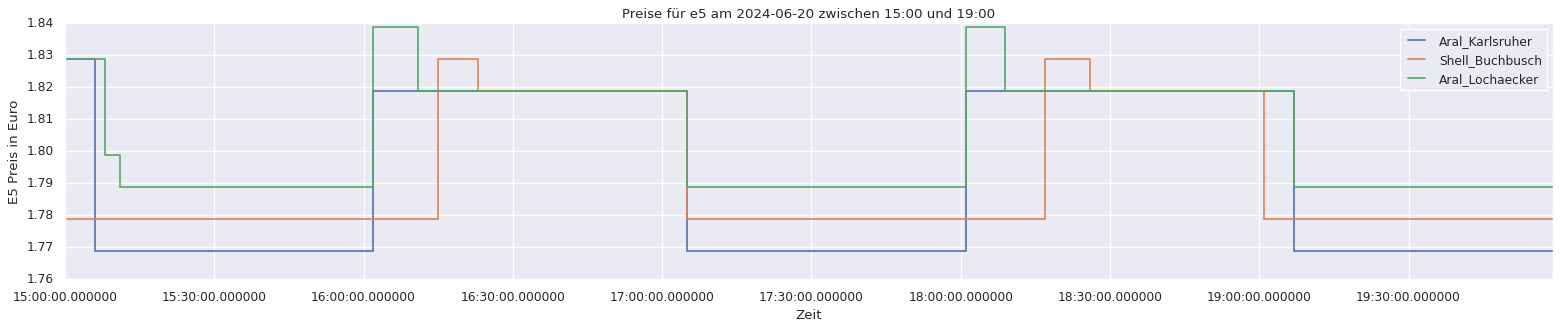

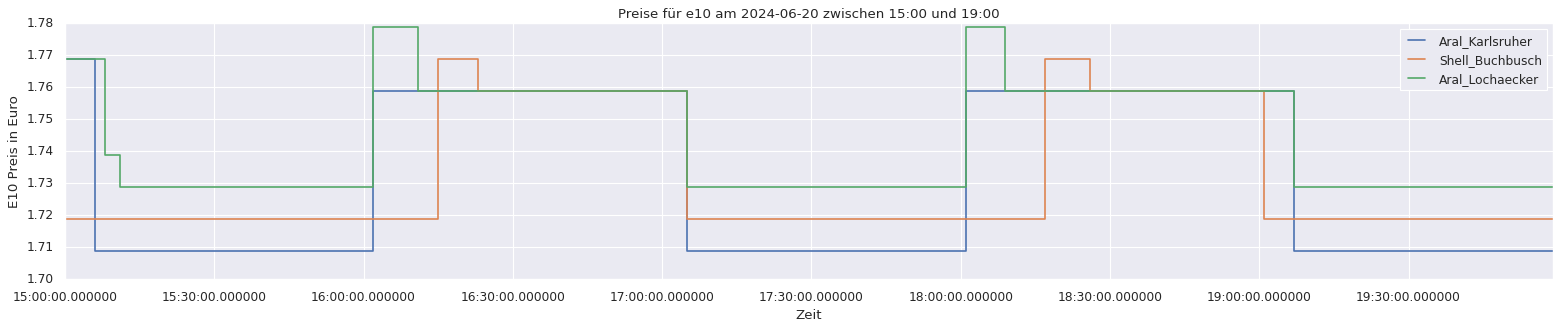

In [63]:
# Konvertierung der 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimmung des Datums und des Zeitrahmens
selected_date = '2024-06-20'
start_hour = 15
end_hour = 19

# Filterung der Daten für das angegebene Datum und den Zeitrahmen
day_data = aral_shell_df[
    (aral_shell_df['date'].dt.date == pd.to_datetime(selected_date).date()) &
    (aral_shell_df['date'].dt.hour >= start_hour) &
    (aral_shell_df['date'].dt.hour <= end_hour)
]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filterung der Daten für die aktuelle Tankstelle und den Tag
        df = day_data[day_data['station_uuid'] == station_id]

        # Erstellung des Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} am {selected_date} zwischen {start_hour}:00 und {end_hour}:00')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Ausgabe des Plot
    plt.show()

### Interpretation der Durchschnittspreise während des Berufsverkehrs am Abend (15:00 bis 20:00 Uhr) für die drei Kraftstoffarten am 20.06.2024

Aral Karlsruher zeigt während des Abendberufsverkehrs die stabilste Preisstruktur über alle drei Kraftstoffarten hinweg und hat die meiste Zeit den niedrigsten Preis.
Die Aral Lochaecker hat, wie vermutet, den höchsten Preis für alle Kraftstoffe und weist die höchsten Preisänderungen auf. Alle anderen Annahmen bestätigen sich auch hier.


# Deskriptive Statistiken für die zwei Wettbewerber und Aral_Lochaecker

**Durchschnitt und Standardabweichung der Preise sowie Durchschnitt der Preise nach Stunde und Wochentag**

<ipython-input-64-a3e2c749b180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


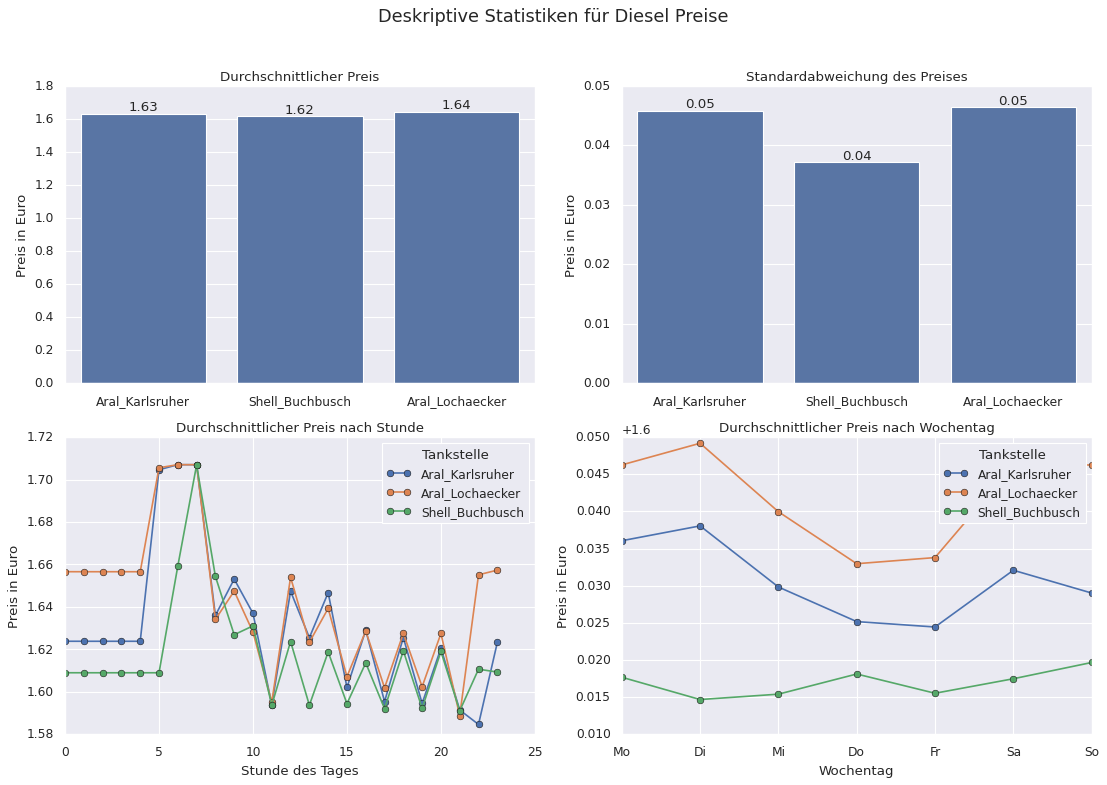

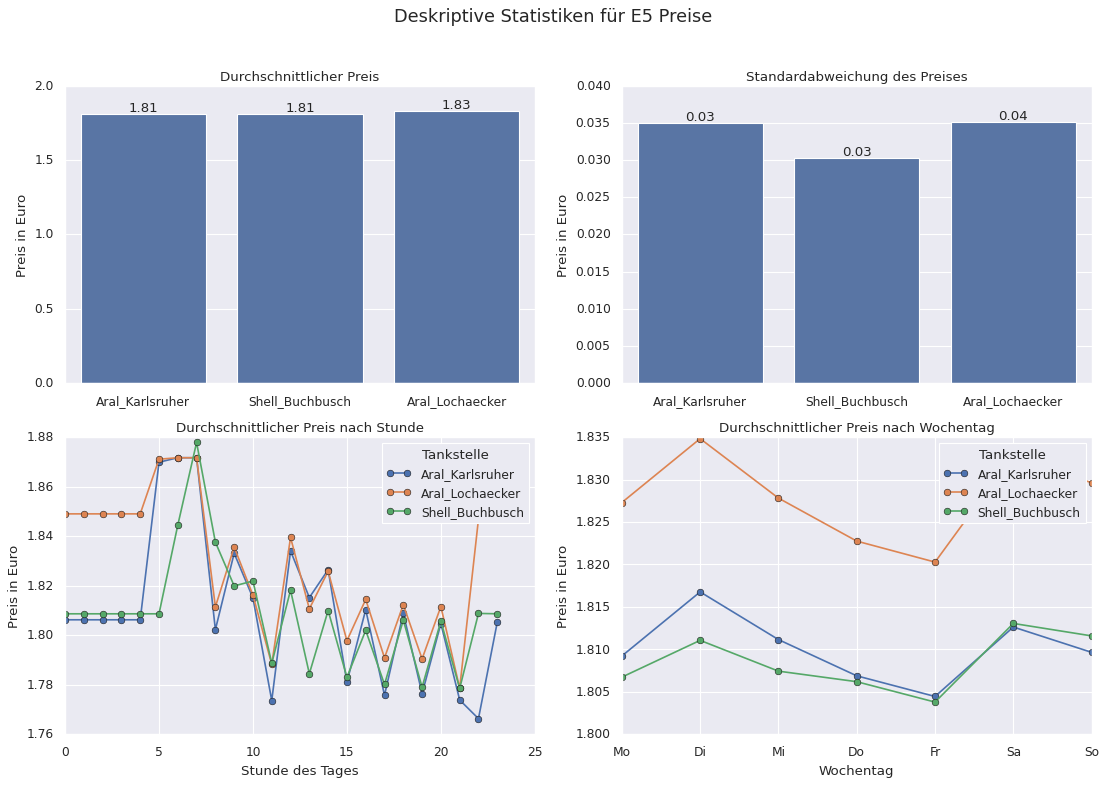

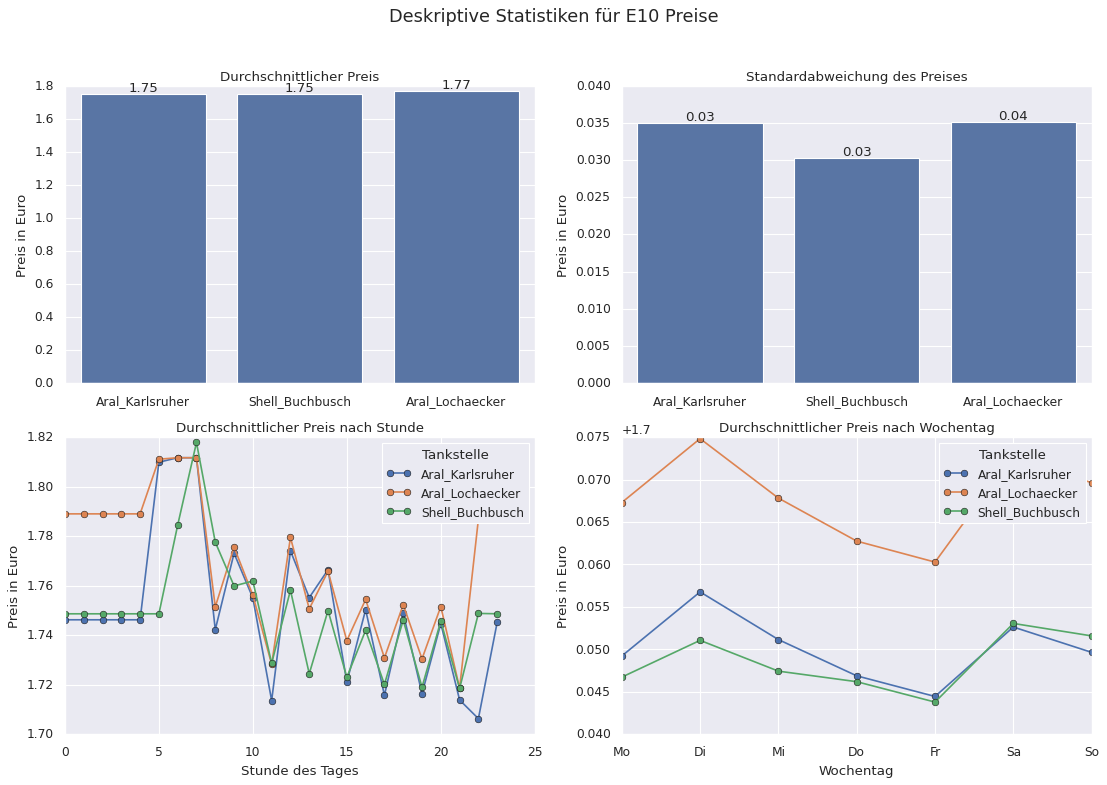

In [64]:
# Konvertierung der 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# IDs der Tankstellen
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Funktion zum Berechnen und Visualisieren der deskriptiven Statistiken
def visualize_statistics(data, fuel):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Deskriptive Statistiken für {fuel.capitalize()} Preise', fontsize=16)

    # Durchschnitt und Standardabweichung
    means = []
    stds = []
    for station_id in station_ids:
        station_data = data[data['station_uuid'] == station_id]
        means.append(station_data[fuel].mean())
        stds.append(station_data[fuel].std())

    # Plot für durchschnittliche Preise
    sns.barplot(x=station_ids, y=means, ax=axes[0, 0])
    axes[0, 0].set_title('Durchschnittlicher Preis')
    axes[0, 0].set_ylabel('Preis in Euro')
    for i in range(len(station_ids)):
        axes[0, 0].text(i, means[i], f'{means[i]:.2f}', ha='center', va='bottom')

    # Plot für Standardabweichung
    sns.barplot(x=station_ids, y=stds, ax=axes[0, 1])
    axes[0, 1].set_title('Standardabweichung des Preises')
    axes[0, 1].set_ylabel('Preis in Euro')
    for i in range(len(station_ids)):
        axes[0, 1].text(i, stds[i], f'{stds[i]:.2f}', ha='center', va='bottom')

    # Durchschnitt nach Stunde
    hourly_means = data.groupby([data['station_uuid'], data['date'].dt.hour])[fuel].mean().unstack(0)
    hourly_means.plot(kind='line', ax=axes[1, 0], marker='o')
    axes[1, 0].set_title('Durchschnittlicher Preis nach Stunde')
    axes[1, 0].set_ylabel('Preis in Euro')
    axes[1, 0].set_xlabel('Stunde des Tages')
    axes[1, 0].legend(title='Tankstelle')

    # Durchschnitt nach Wochentag
    weekday_means = data.groupby([data['station_uuid'], data['date'].dt.weekday])[fuel].mean().unstack(0)
    weekday_means.plot(kind='line', ax=axes[1, 1], marker='o')
    axes[1, 1].set_title('Durchschnittlicher Preis nach Wochentag')
    axes[1, 1].set_ylabel('Preis in Euro')
    axes[1, 1].set_xlabel('Wochentag')
    axes[1, 1].set_xticks(range(7))
    axes[1, 1].set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
    axes[1, 1].legend(title='Tankstelle')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Loop durch alle Kraftstoffarten und Visualisierung der Statistiken
for fuel in fuel_types:
    visualize_statistics(aral_shell_df, fuel)


## Interpretation

**Durchschnittlicher Preis**

Aral_Lochaecker hat durchweg die höchsten durchschnittlichen Preise für alle Kraftstoffarten, was auf eine Premium-Positionierung, Standortvorteile und eine weniger preissensible Kundschaft hindeutet.
Shell_Buchbusch hat den niedrigsten Dieselpreis und teilt sich die gleichen Preise für E5 und E10 mit Aral_Karlsruher, was auf eine preisbewusste Strategie hindeutet.
Aral_Karlsruher positioniert sich preislich zwischen Aral_Lochaecker und Shell_Buchbusch für Diesel und gleicht Shell_Buchbusch bei E5 und E10.

**Standardabweichung des Preises**

Aral_Lochaecker zeigt die größte Preisschwankung über alle Kraftstoffarten hinweg, was auf eine flexible und aggressive Preisstrategie hinweist.
Shell_Buchbusch und die Aral_Karlsruher haben die gleichen Standardabweichungen über die Kraftstoffe hinweg.

**Verlauf durchschnittlicher Preis nach Stunde**

Aral_Lochaecker zeigt höhere Preise, besonders in den frühen Morgenstunden für alle Kraftstoffarten. Auch über den gesamten Tag sind sie Preisführer. Die Shell_Buchbusch hat die stabilsten und niedrigsten Preise für E5 und Diesel.
Die Aral_Karlsruher zeigt eine flexible Preisstrategie, ähnlich wie Aral_Lochaecker mit gemeinsamen und deutlichen Preisanstiegen in den frühen Morgenstunden und Schwankungen während des Tages.


**Verlauf durchschnittlicher Preis nach Wochentag**

Aral_Lochaecker tendiert dazu, zu Wochenbeginn höhere Preise zu haben, die im Verlauf der Woche sinken, mit einem leichten Anstieg am Freitag. Diese Strategie könnte auf eine höhere Nachfrage zu Beginn der Woche abzielen
Shell_Buchbusch hat die stabilsten und niedrigsten Preise über die gesamte Woche hinweg.
Aral_Karlsruher zeigt einen flexiblen Preisverlauf mit höheren Preisen zu Beginn der Woche und Schwankungen im Verlauf der Woche. Diese Strategie könnte darauf abzielen, die Preise an die wöchentliche Nachfrage anzupassen.



## **Durchschnittliche Anzahl der Preisänderungen nach Stunde und Wochentag**

<ipython-input-65-e02a4f95fb49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


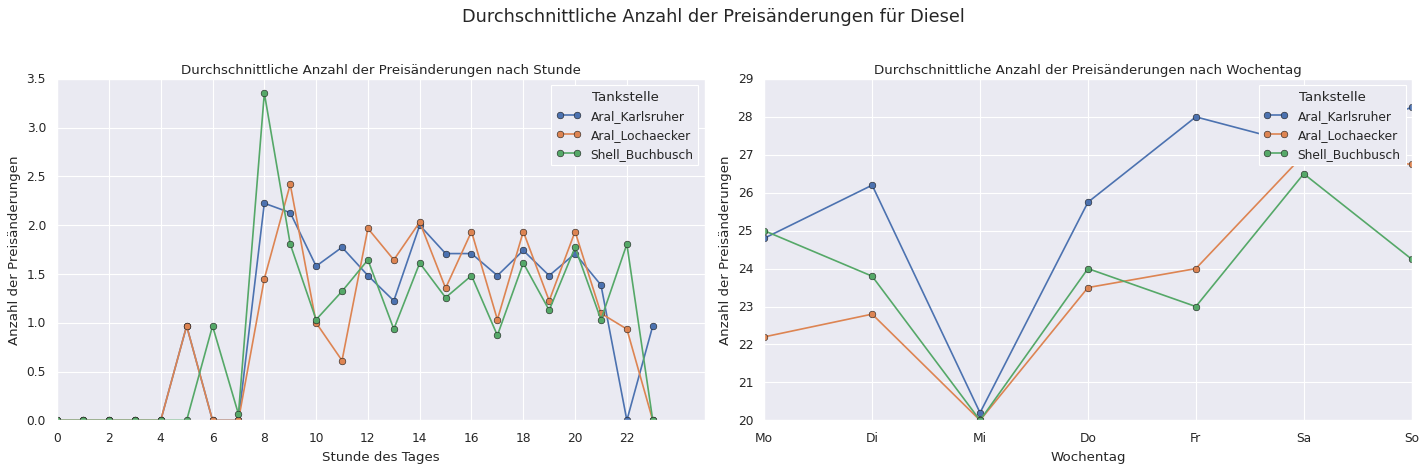

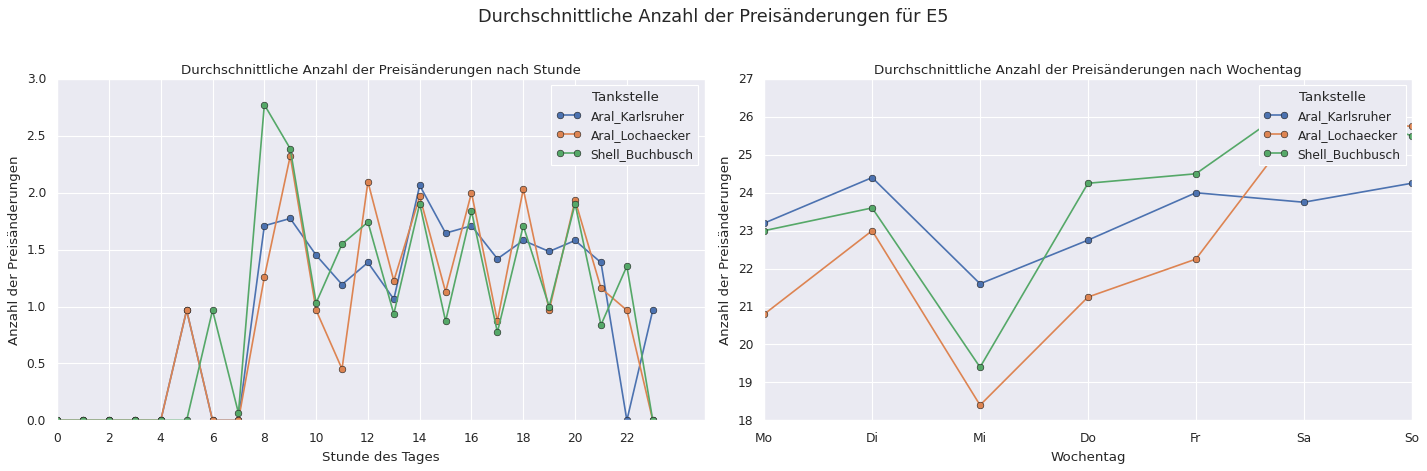

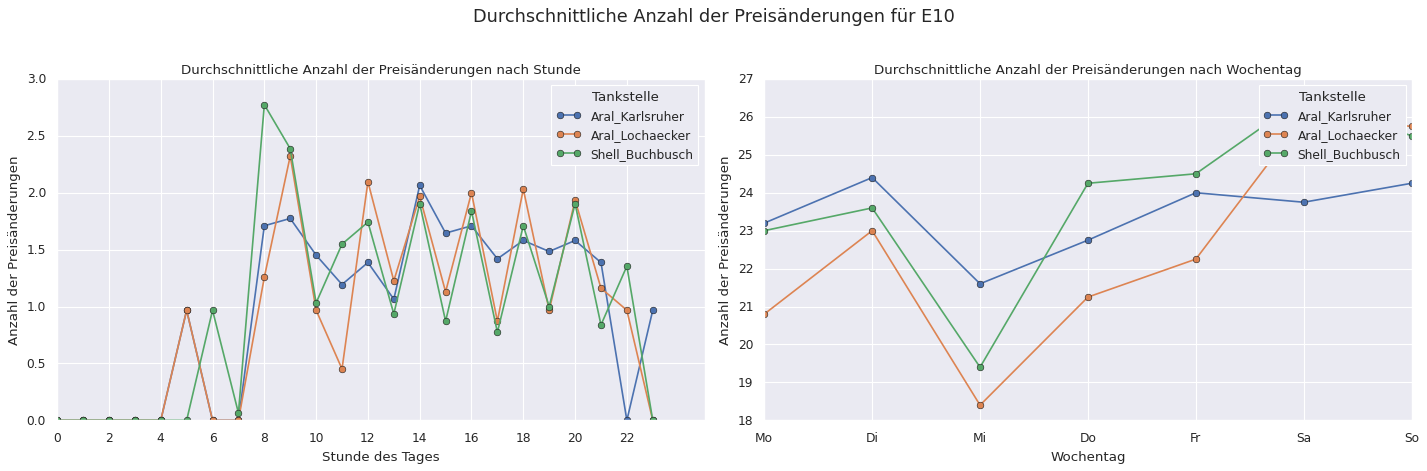

In [65]:
# Konvertierung der 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# IDs der Tankstellen
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_changes = ['dieselchange', 'e5change', 'e10change']
fuel_labels = ['Diesel', 'E5', 'E10']

# Berechnung der Anzahl der Tage im Datensatz
num_days = aral_shell_df['date'].dt.date.nunique()

# Berechnung der Anzahl der Vorkommen eines jeden Wochentages im Datensatz
unique_dates = aral_shell_df['date'].dt.date.unique()
weekday_counts = pd.Series([date.weekday() for date in unique_dates]).value_counts().sort_index()

# Funktion zum Berechnen und Visualisieren der durchschnittlichen Anzahl der Preisänderungen
def visualize_avg_price_changes(data, fuel_change_column, fuel_label):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Durchschnittliche Anzahl der Preisänderungen für {fuel_label}', fontsize=16)

    # Berechnung der durchschnittlichen Anzahl der Preisänderungen nach Stunde
    hourly_changes = data.groupby([data['station_uuid'], data['date'].dt.hour])[fuel_change_column].sum().unstack(0)
    hourly_avg_changes = hourly_changes / num_days

    # Plot für durchschnittliche Anzahl der Preisänderungen nach Stunde
    hourly_avg_changes.plot(kind='line', ax=axes[0], marker='o')
    axes[0].set_title('Durchschnittliche Anzahl der Preisänderungen nach Stunde')
    axes[0].set_ylabel('Anzahl der Preisänderungen')
    axes[0].set_xlabel('Stunde des Tages')
    axes[0].set_xticks(range(0, 24, 2))  # Zeigt alle 2 Stunden auf der X-Achse an
    axes[0].legend(title='Tankstelle')

    # Berechnung der durchschnittlichen Anzahl der Preisänderungen nach Wochentag
    weekday_changes = data.groupby([data['station_uuid'], data['date'].dt.weekday])[fuel_change_column].sum().unstack(0)
    weekday_avg_changes = weekday_changes.divide(weekday_counts, axis=0)

    # Plot für durchschnittliche Anzahl der Preisänderungen nach Wochentag
    weekday_avg_changes.plot(kind='line', ax=axes[1], marker='o')
    axes[1].set_title('Durchschnittliche Anzahl der Preisänderungen nach Wochentag')
    axes[1].set_ylabel('Anzahl der Preisänderungen')
    axes[1].set_xlabel('Wochentag')
    axes[1].set_xticks(range(7))
    axes[1].set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
    axes[1].legend(title='Tankstelle')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Loop durch alle Kraftstoffarten und visualisiere die Statistiken
for fuel_change, fuel_label in zip(fuel_changes, fuel_labels):
    visualize_avg_price_changes(aral_shell_df, fuel_change, fuel_label)



### Interpretation


**Durchschnittliche Anzahl der Preisänderungen nach Stunde**

Aral_Lochaecker und Shell_Buchbusch zeigen sehr ähnlich Muster bei der durchschnittlichen Anzahl der Preisänderungen pro Stunde, die tagsüber überwiegend zwischen 1 und 2 liegt. Die Aral_Karlsruher verhält sich hierbei in einem anderen Muster, was darauf hindeuten könnten, dass die Lage hier einen Einfluss nimmt.


**Interpretation Durchschnittliche Anzahl der Preisänderungen nach Wochentag**

Die Grafik zeigt, dass alle drei Tankstellen mittwochs am seltensten die Preise ändern, was daran liegen könnte, dass die Nachfrage durch Pendler in der Wochenmitte geringer ist und daher weniger auf Spitzen reagiert werden muss. Am Wochenende werden die Preise deutlich häufiger geändert. Den größten Anstieg zum Wochenende hat dabei die Aral_Lochaecker.


# Forecasting


Die bisherigen Analysen haben gezeigt, dass unsere Tankstelle auf flexible und dynamische Preise setzt und als Preisführer gilt, insbesondere im Vergleich zu den identifizierten großen Konkurrenten. Jetzt stellt sich jedoch die Frage, wie genau der Preis geführt werden soll. Es wäre hinderlich, den Preis entgegen des allgemeinen Trends vorzugeben, da dadurch keine Gewinnmaximierung erreicht werden kann. Deshalb muss die Preisentwicklung detailliert analysiert werden und bei der Preisgestaltung berücksichtigt werden. Dabei stellt sich die Frage, welche Preise analysiert werden sollen. Eine Möglichkeit wäre, die Preise der Wettbewerber zu analysieren, um auf deren Preisänderungen vorbereitet zu sein. Im ersten Schritt scheint es aber sinnvoller, die eigene Preisentwicklung zu analysieren, da wir der Preisführer sind und somit die Preisentwicklung der Wettbewerber auch maßgeblich von unseren Preisentscheidungen beeinflusst wird. Deshalb fokussieren wir uns im Rahmen der Zeitreihenanalyse auf unsere Tankstelle und untersuchen zunächst jeden Kraftstofftyp. Um zunächst von einem hohen Detailgrad auszugehen und keine Varianz in den Preisen zu unterschlagen, beginnen wir mit einer Analyse der minütlichen Preise.

## Preprocessing

Um die Zeitreihenanalyse sinnvoll durchführen zu können und auch flexibel zu gestalten, sodass der Code schnell auf andere Tankstellen angewandt werden kann, sollte der Datensatz umstrukturiert werden. Aktuell gibt es eine Zeile pro Preisänderung einer Tankstelle. Diese Struktur ist hinderlich für die Zeitreihenanalyse. Daher ist das Ziel, je eine Tankstelle je Tankstelle und Kraftstofftyp zu erstellen und in den Zeilen den Preis pro Minuten je Tankstelle und Kraftstofftyp abzubilden.

**Filtern nach Tankstellen in Pforzheim:**

In [ ]:
data = raw_data[raw_data['station_uuid'].isin(ids_pf)]

In [ ]:
data.head()

**Umwandlung des Datums zur Vorbereitung der Umcodierung des Datensatzes:**
* Datumsspalte in Datumsformat umwandeln
* Zeitzone anpassen (die bisherige Zeitzone war UTC)
* Zeitzone entfernen (da alle untersuchten in derselben Zeitzone sind)
* Datum als Index setzen (erleichtert den Zugriff und somit die geplante Umwandlung)
* Index auf nächste volle Minute runden (um die Daten zu vereinheitlichen)



In [ ]:
data['date'] = pd.to_datetime(data['date'])

data['date'] = data['date'].dt.tz_convert('Europe/Berlin').dt.tz_localize(None)

data.set_index('date', inplace=True)

data.index = data.index.round('T')

**Erstellung eines neuen Dataframes für die umgewandelten Daten:**
* Das neue Dataframe enthält einen Datums- und Zeitindex für jede Minute innerhalb des Untersuchunszeitraums
* Dieses Vorgehen ermöglicht konsistente Analysen

In [ ]:
start_date = data.index.min()
end_date = data.index.max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='T')
df = pd.DataFrame(index=all_dates)

**Füllung des neuen Dataframes mit Daten:**
* In temporären Dataframes werden die Daten aus dem ursprünglichen Dateframe übernommen (also nur immer wenn sich der Preis geändert hat): Dabei gibt es ein temporäres Dateframe für jede Kombination aus Tankstelle und Kraftstoffart. Die Kombination wird durch den neuen Spaltentitel reflektiert, sodass die Daten im Nachhinein gut fusioniert werden können.
* Es werden Duplikate im Index des temporären Dataframes gelöscht, um sicherzustellen, dass jeder Zeitpunkt einzigarti ist.
* Die temporären Dataframes werden neu indiziert, um mit dem Index des gewünschten Dataframes df übereinzustimmen. Fehlende Werte werden "vorwärts gefüllt", d.h. der letzte bekannte Preis wird übernommen bei NA-Werten.
* Die Dataframes werden mit dem gewünschten Dataframe fusioniert

In [ ]:
for station in data['station_uuid'].unique():
    for fuel_type in ['diesel', 'e5', 'e10']:
        temp_data = data[(data['station_uuid'] == station) & (data[f"{fuel_type}change"] == 1)]
        temp_data = temp_data[[fuel_type]].rename(columns={fuel_type: f"{station}_{fuel_type}"})


        temp_data = temp_data[~temp_data.index.duplicated(keep='first')]

        temp_data_reindexed = temp_data.reindex(df.index, method='ffill')

        df = df.join(temp_data_reindexed, how='left')

**Auffüllen der Preise:**
Dieser Code füllt fehlende Preisdaten im DataFrame df vorwärts auf.

Begründung:
Nachdem die temporären Dataframes mit dem gewünschten Dataframe zusammengeführt wurden, können weiterhin fehlende Werte auftreten. Dies liegt daran, dass nicht alle Tankstellen zu jedem Zeitpunkt Preisdaten für jeden Kraftstofftyp haben. Die Zusammenführung fügt neue Spalten zu df hinzu, aber für Zeiten, zu denen keine Preisdaten für eine bestimmte Tankstelle vorhanden waren, bleiben die Werte in diesen neuen Spalten leer.

In [ ]:
df.ffill(inplace=True)

In [ ]:
df.head()

**Datum als Spalte speichern um Datentransfer zu R zu vereinfachen:**

In [ ]:
df.reset_index(inplace=True, drop=False)

In [ ]:
df = df.rename(columns={'index': 'date'})

**Aus dem Datum die Stunde, den wochentag und die Minute extrahieren:**

In [ ]:
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday
df['minute'] = df['date'].dt.minute

**Spalten umbenennen damit sie besser lesbar sind:**

In [ ]:
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}


def rename_columns(column_name):
    for uuid in station_names.keys():
        if uuid in column_name:
            new_name = station_names[uuid]
            return column_name.replace(uuid, new_name if new_name else "StationNamePlaceholder")
    return column_name

df.columns = [rename_columns(col) for col in df.columns]

In [ ]:
df.head(10000)

In [ ]:
df.to_csv("prices.csv")

## Laden der Daten

Da für die Zeitreihenanalyse ein größerer Beobachtungszeitraum gewählt wurde, wurden diese Daten bereits in einem anderen Dokument geladen und vorverarbeitet. Nun muss dieser Datensatz in das Notebook geladen werden. Zu beachten ist, dass sich die Endzeitpunkte der Datensätze der bisherigen Analysen und der nun durchgeführten Zeitreihenanalyse um drei Tage unterscheiden.

In [ ]:
# Verbindung zu Google Drive
drive.mount('/content/drive/')

In [ ]:
# Verzeichnis mit den Excel-Dateien
directory = '/content/drive/My Drive/SEDA'

In [ ]:
file_path = "/content/drive/My Drive/SEDA/60dprices.csv"

# Lade die CSV-Datei mit pandas
df = pd.read_csv(file_path)

In [ ]:
df.head()

## Diesel

#### Prediction

**Dataframe vorbereiten:**

Zunächst werden die benötigten Spalten ausgewählt:

In [ ]:
df_ts_diesel = df[['date', 'Aral_Lochaecker_diesel']].copy()

In [ ]:
df_ts_diesel.head()

Anschließend werden die für Prophet benötigten Variablen definiert und das Modell geschätzt. Hierfür verwenden wir bei Prophet die minütlichen Daten und sagen den Preis für die nächsten 24 Stunden vorher:

In [ ]:
df_ts_diesel["ds"] = df.date
df_ts_diesel["y"] = df.Aral_Lochaecker_diesel

Da eine minutengenaue Vorhersage für die nächsten 24 Stunden durchgeführt wird, ergibt sich:

In [ ]:
hours_ahead = 24*60

**Vorhersage:**

In [ ]:
m = Prophet(changepoint_prior_scale=0.01).fit(df_ts_diesel)
future = m.make_future_dataframe(periods=hours_ahead, freq='min') # Prognose für Minuten
fcst_diesel = m.predict(future) # Forecast berechnen
fig = m.plot(fcst_diesel) # Forecast visualisieren mit letzten bekannten Werten

Die Visualisierung zeigt die tatsächlichen Werte der Zeitreihe (schwarze Punkte), die prognostizieren Werte (blaue Linie) und das Konfizenzintervall (hellblaue Schattierung).


Es zeigt dass die Vorhersage nicht schlecht ist, um sie genauer untersuchen zu können und besser für die Preisstrategie nutzen zu können, sollte man die Komponenten der Zeitreihe extrahieren:

**Komponentenzerlegung:**

In [ ]:
# Darstellung der Komponenten des Forecasts
m.plot_components(fcst_diesel)

Es fällt besonders auf, dass die Unterschiede innerhalb eines Tages deutlich größer sind als die innerhalb einer Woche. Außerdem ist kein linearer Trend erkennbar.

In [ ]:
fcst_diesel.tail(hours_ahead)[['ds', 'yhat']]

### Abgleich Actuals für Gestern

Um die Güter der Vorhersage zu überprüfen, bietet es sich an, die für gestern vorhergesagten Werte mit den tatsächlichen Werten zu vergleichen.

In [ ]:
actuals = df_ts_diesel.tail(1440)[['ds', 'y']]
forecast = fcst_diesel.tail(hours_ahead+1440).head(1440)[['ds', 'yhat']] # yesterdays forecasts are in column yhat

actuals['ds'] = pd.to_datetime(actuals['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])


merged_diesel = pd.merge(actuals, forecast, on='ds')

merged_diesel


**RMSE:**

Eine nützliche Maßzahl, um die Güte des Modells zu bewerten, ist das RMSE (Root Mean Square Error). Es ist ein statistisches Maß, das die Differenz zwischen den Werten, die von einem Modell vorhergesagt werden, und den tatsächlich beobachteten Werten quantifiziert.

In [ ]:
# Calculate the RMSE
def calculate_rmse(df, col1, col2):
    differences = df[col1] - df[col2]
    squared_differences = differences ** 2
    mean_squared_differences = squared_differences.mean()
    rmse = np.sqrt(mean_squared_differences)
    return rmse

rmse = calculate_rmse(merged_diesel, 'y', 'yhat')
print(f"The RMSE between forecast and observation for yesteday is: {rmse*100} Cents ")

**Visualisierung:**

Doch auch eine Visualisierung hilft sehr, um die Güte der Prognose zu begutachten:

In [ ]:
plt.figure(figsize=(24, 6))
plt.step(merged_diesel.ds, merged_diesel.y, where='pre', label='Actual Prices', color='blue', linestyle='-')
plt.step(merged_diesel.ds, merged_diesel.yhat, where='pre', label='Forecasted Prices', color='red', linestyle='--')


plt.title('Yesterdays Prices vs. Prediction (Diesel)')
plt.xlabel('Time')
plt.ylabel('Diesel Price in Euro vs. Prediction')

plt.legend()

plt.show()



Es zeigt sich, dass die Prognose insbesondere auf die Preisänderungen innerhalb des Tages noch nicht perfekt reagiert, der grundlegende Trend wird aber abgebildet.

### Fehleranalyse

Um die Güte des Modells zu überprüfen, bietet es sich zudem an, die Fehler genauer zu analysieren. Hierfür berechnen wir die absoluten Fehler der Vorhersage für gestern. Außerdem untersuchen wir das Ausmaß der Fehler und berechnen den prozentualen Fehler.

In [ ]:
merged_diesel['abs_error'] = abs(merged_diesel['y'] - merged_diesel['yhat'])
merged_diesel['squared_error'] = (merged_diesel['y'] - merged_diesel['yhat'])**2
merged_diesel['percentage_error'] = abs(merged_diesel['y'] - merged_diesel['yhat']) / merged_diesel['y'] * 100

In [ ]:
import matplotlib.pyplot as plt

# Plotting Absolute Error over Time
plt.figure(figsize=(14, 7))
plt.plot(merged_diesel['ds'], merged_diesel['abs_error'], label='Absolute Error')
plt.title('Absolute Error Over Time')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(merged_diesel['abs_error'], bins=30, alpha=0.7)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
error_metrics = {
    'Mean Percentage Error': merged_diesel['percentage_error'].mean()
}
print(error_metrics)

Es zeigt sich auch hier, dass die größten Fehler am Tag gemacht werden, wenn viele Preisänderungen durchgeführt werden, insgesamt befinden sich die meisten Fehler aber im Bereich unter 2 Cent.


Im nächsten Schritt werden auch die E5- und E10-Preise analysiert.

## E5

#### Prediction

**Dataframe vorbereiten:**

In [ ]:
df_ts_e5 = df[['date', 'Aral_Lochaecker_e5']].copy()

In [ ]:
df_ts_e5.head()

In [ ]:
# Prophet erfordert bestimmte Spaltennamen
# ds für Datum/Uhrzeit ohne Zeitzone
# y für Werte
df_ts_e5["ds"] = df.date
df_ts_e5["y"] = df.Aral_Lochaecker_e5 # Ändern für E5/E10

In [ ]:
hours_ahead = 24*60

**Vorhersage:**

In [ ]:
m = Prophet(changepoint_prior_scale=0.01).fit(df_ts_e5) # 5 Min Genauigkeit nutzen für Model
future = m.make_future_dataframe(periods=hours_ahead, freq='min') # Prognose für Stunden
fcst_e5 = m.predict(future) # Forecast berechnen
fig = m.plot(fcst_e5) # Forecast visualisieren mit letzten bekannten Werten

Es zeigt sich, dass der Trend bei E5 eher einem linearen Trend ähnelt als bei Diesel, es ist (noch) kein Trendwechsel wie bei Diesel zu erkennen.

**Komponentenzerlegung:**

In [ ]:
# Darstellung der Komponenten des Forecasts
m.plot_components(fcst_e5)

Sie saisonalen Komponenten sind bei E5 sehr änhlich wie bei Diesel, der Unterschied liegt insbesondere im Trend.

In [ ]:
fcst_e5.tail(hours_ahead)[['ds', 'yhat']]

### Abgleich Actuals für Gestern

In [ ]:
actuals = df_ts_e5.tail(1440)[['ds', 'y']]
forecast = fcst_e5.tail(hours_ahead+1440).head(1440)[['ds', 'yhat']] # yesterdays forecasts are in column yhat

actuals['ds'] = pd.to_datetime(actuals['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])


merged_e5 = pd.merge(actuals, forecast, on='ds')

merged_e5


**RMSE:**

In [ ]:
# Calculate the RMSE
def calculate_rmse(df, col1, col2):
    differences = df[col1] - df[col2]
    squared_differences = differences ** 2
    mean_squared_differences = squared_differences.mean()
    rmse = np.sqrt(mean_squared_differences)
    return rmse

rmse = calculate_rmse(merged_e5, 'y', 'yhat')
print(f"The RMSE between forecast and observation for yesteday is: {rmse*100} Cents ")

Im Vergleich zur Vorhersage des Diesel ist der RMSE bei E5 geringer.

**Visualisierung:**

In [ ]:
plt.figure(figsize=(24, 6))
plt.step(merged_e5.ds, merged_e5.y, where='pre', label='Actual Prices', color='blue', linestyle='-')
plt.step(merged_e5.ds, merged_e5.yhat, where='pre', label='Forecasted Prices', color='red', linestyle='--')

plt.title('Yesterdays Prices vs. Prediction (E5)')
plt.xlabel('Time')
plt.ylabel('E5 Price in Euro vs. Prediction')


plt.legend()

plt.show()



### Fehleranalyse

Um die Güte des Modells zu überprüfen, bietet es sich zudem an, die Fehler genauer zu analysieren. Hierfür berechnen wir die absoluten Fehler der Vorhersage für gestern. Außerdem untersuchen wir das Ausmaß der Fehler und berechnen den prozentualen Fehler.

In [ ]:
merged_e5['abs_error'] = abs(merged_e5['y'] - merged_e5['yhat'])
merged_e5['squared_error'] = (merged_e5['y'] - merged_e5['yhat'])**2
merged_e5['percentage_error'] = abs(merged_e5['y'] - merged_e5['yhat']) / merged_e5['y'] * 100

In [ ]:
import matplotlib.pyplot as plt

# Plotting Absolute Error over Time
plt.figure(figsize=(14, 7))
plt.plot(merged_e5['ds'], merged_e5['abs_error'], label='Absolute Error')
plt.title('Absolute Error Over Time')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

Auch bei E5 zeigt sich trotz insgesamt kleineren Fehlern, dass die Preisschwankungen am Tag noch nicht perfekt prognostiziert werden können.

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(merged_e5['abs_error'], bins=30, alpha=0.7)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

Der Großteil der Fehler liegt in einem sehr kleinen Bereich.

In [ ]:
error_metrics = {
    'Mean Percentage Error': merged_e5['percentage_error'].mean()
}
print(error_metrics)

## E10

#### Prediction

**Dataframe vorbereiten:**

In [ ]:
df_ts_e10 = df[['date', 'Aral_Lochaecker_e10']].copy()

In [ ]:
df_ts_e10.head()

In [ ]:
# Prophet erfordert bestimmte Spaltennamen
# ds für Datum/Uhrzeit ohne Zeitzone
# y für Werte
df_ts_e10["ds"] = df.date
df_ts_e10["y"] = df.Aral_Lochaecker_e10 # Ändern für E5/E10

In [ ]:
hours_ahead = 24*60

**Vorhersage:**

In [ ]:
m = Prophet(changepoint_prior_scale=0.01).fit(df_ts_e10) # 5 Min Genauigkeit nutzen für Model
future = m.make_future_dataframe(periods=hours_ahead, freq='min') # Prognose für Stunden
fcst_e10 = m.predict(future) # Forecast berechnen
fig = m.plot(fcst_e10) # Forecast visualisieren mit letzten bekannten Werten

E10 verhält sich sehr ähnlich wie E5.

**Komponentenzerlegung:**

In [ ]:
# Darstellung der Komponenten des Forecasts
m.plot_components(fcst_e10)

In [ ]:
fcst_e10.tail(hours_ahead)[['ds', 'yhat']]

### Abgleich Actuals für Gestern

In [ ]:
actuals = df_ts_e10.tail(1440)[['ds', 'y']]
forecast = fcst_e10.tail(hours_ahead+1440).head(1440)[['ds', 'yhat']] # yesterdays forecasts are in column yhat

actuals['ds'] = pd.to_datetime(actuals['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])


merged_e10 = pd.merge(actuals, forecast, on='ds')

merged_e10


**RMSE:**

In [ ]:
# Calculate the RMSE
def calculate_rmse(df, col1, col2):
    differences = df[col1] - df[col2]
    squared_differences = differences ** 2
    mean_squared_differences = squared_differences.mean()
    rmse = np.sqrt(mean_squared_differences)
    return rmse

rmse = calculate_rmse(merged_e10, 'y', 'yhat')
print(f"The RMSE between forecast and observation for yesteday is: {rmse*100} Cents ")

**Visualisierung:**

In [ ]:
plt.figure(figsize=(24, 6))
plt.step(merged_e10.ds, merged_e10.y, where='pre', label='Actual Prices', color='blue', linestyle='-')
plt.step(merged_e10.ds, merged_e10.yhat, where='pre', label='Forecasted Prices', color='red', linestyle='--')

plt.title('Yesterdays Prices vs. Prediction (E10)')
plt.xlabel('Time')
plt.ylabel('E10 Price in Euro vs. Prediction')

plt.legend()

plt.show()



### Fehleranalyse

Um die Güte des Modells zu überprüfen, bietet es sich zudem an, die Fehler genauer zu analysieren. Hierfür berechnen wir die absoluten Fehler der Vorhersage für gestern. Außerdem untersuchen wir das Ausmaß der Fehler und berechnen den prozentualen Fehler.

In [ ]:
merged_e10['abs_error'] = abs(merged_e10['y'] - merged_e10['yhat'])
merged_e10['squared_error'] = (merged_e10['y'] - merged_e10['yhat'])**2
merged_e10['percentage_error'] = abs(merged_e10['y'] - merged_e10['yhat']) / merged_e10['y'] * 100

In [ ]:
import matplotlib.pyplot as plt

# Plotting Absolute Error over Time
plt.figure(figsize=(14, 7))
plt.plot(merged_e10['ds'], merged_e10['abs_error'], label='Absolute Error')
plt.title('Absolute Error Over Time')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(merged_e10['abs_error'], bins=30, alpha=0.7)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
 error_metrics = {
    'Mean Percentage Error': merged_e10['percentage_error'].mean()
}
print(error_metrics)

## Zwischenfazit

Die minutengenaue Zeitreihenanalyse ermöglicht wichtige Erkenntnisse, ist aber insbesondere bei Diesel noch nicht perfekt. Ein möglicher Ansatz ist, die Analyse nicht auf minutengenauen sondern stundengenauen Daten durchzuführen, um die Effizienz der Analyse zu verbessern und durch den Ausschluss minutengenauer Änderungen, welche für die Ableitung der Preisentwicklung über den gesamten Tag hinweg irrelevant sein können, die Vorhersagegüte zu verbessern. Da insbesondere die genauere Analyse des Dieselpreises relevant ist, fokussieren wir uns nachfolgend auf diesen Kraftstofftyp.

## Diesel (stündlich)

Da es für die Umsetzung der Preisstrategie genügen würde, die stündliche Entwicklung des Preises zu kennen, wird für Diesel erneut das Forecating ausgeführt, aber auf Basis von stündlichen Daten.

#### Prediction

**Dataframe vorbereiten:**

Zunächst wird das Datumsformat erneut sichergestellt:

In [ ]:
df['date'] = pd.to_datetime(df['date'])

Anschließend werden die stündlichen Daten berechnet:

In [ ]:
df_hourly = df.resample('H', on='date').mean().reset_index()

Das restliche Vorgehen unterscheidet sich kaum von der minutengenauen Analyse, einzig manche Parameter müssen angepasst werden. Insbesondere von Interesse ist, inwiefern sich das RMSE beim Vergleich zu den tatsächlichen Daten von gestern verändert. Es werden die stündlichen Preise für die nächsten 24 Stunden vorhergesagt:

In [ ]:
df_hourly_prophet = df_hourly.rename(columns={'date': 'ds', 'Aral_Lochaecker_diesel': 'y'})

In [ ]:
hours_ahead = 24

**Vorhersage:**

In [ ]:
m = Prophet(changepoint_prior_scale=0.01)
m.fit(df_hourly_prophet)
future = m.make_future_dataframe(periods=hours_ahead, freq='H')  # 'H' für stündliche Vorhersage
fcst_diesel_hourly = m.predict(future)
fig = m.plot(fcst_diesel_hourly)

**Komponentenzerlegung:**

In [ ]:
# Darstellung der Komponenten des Forecasts
m.plot_components(fcst_diesel_hourly)

Es fällt besonders auf, dass die Unterschiede innerhalb eines Tages deutlich größer sind als die innerhalb einer Woche. Außerdem ist kein linearer Trend erkennbar.

In [ ]:
fcst_diesel_hourly.tail(hours_ahead)[['ds', 'yhat']]

### Abgleich Actuals für Gestern

Bei dem Vergleich zu den tatsächlichen Werte von gestern muss nur die Wahl der Actuals angepasst werden.

In [ ]:
actuals = df_hourly_prophet.tail(24)
forecast = fcst_diesel_hourly.tail(hours_ahead + 24).head(24)[['ds', 'yhat']]

actuals['ds'] = pd.to_datetime(actuals['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

merged_diesel_hourly = pd.merge(actuals, forecast, on='ds')

**RMSE:**

Eine nützliche Maßzahl, um die Güte des Modells zu bewerten, ist das RMSE (Root Mean Square Error). Es ist ein statistisches Maß, das die Differenz zwischen den Werten, die von einem Modell vorhergesagt werden, und den tatsächlich beobachteten Werten quantifiziert.

In [ ]:
# Calculate the RMSE
import numpy as np

def calculate_rmse(df, col1, col2):
    differences = df[col1] - df[col2]
    squared_differences = differences ** 2
    mean_squared_differences = squared_differences.mean()
    rmse = np.sqrt(mean_squared_differences)
    return rmse

rmse = calculate_rmse(merged_diesel_hourly, 'y', 'yhat')
print(f"The RMSE between forecast and observation for yesterday is: {rmse*100} Cents")


Das RMSE liegt nun bei 2,66 Cent (Vergleich zu minutengenauer Vorhersage: 3,04 Cent). Es ist logisch, dass das Modell besser ist, wenn die Varianz innerhalb einer Stunde nicht berücksichtigt wird. Aus strategischer Sicht ist es aber sinnvoll, die stündlichen Daten zu verwenden, da der Fokus der Zeitreihenanalyse für unsere Tankstelle darauf liegt, unsere Preisstrategie optimal umsetzen zu können. Hierfür sollten wir möglichst genau analysieren können, wie sich die Preise weiterentwickeln. Dabei ist aber wichtiger, wie sich die Preise in den nächsten Stunden weiterentwickeln. Zu welcher Minute dann die Preisänderung durchgeführt werden sollte, ergibt sich in der operativen Umsetzung und dem deskriptiven Vergleich mit den Konkurrenten. Daher werden nachfolgend stündliche Daten für die weitere Analyse verwendet.

**Visualisierung:**

Doch auch eine Visualisierung hilft sehr, um die Güte der Prognose zu begutachten:

In [ ]:
plt.figure(figsize=(24, 6))
plt.step(merged_diesel_hourly.ds, merged_diesel_hourly.y, where='pre', label='Actual Prices', color='blue', linestyle='-')
plt.step(merged_diesel_hourly.ds, merged_diesel_hourly.yhat, where='pre', label='Forecasted Prices', color='red', linestyle='--')


plt.title('Yesterdays Prices vs. Prediction (Diesel)')
plt.xlabel('Time')
plt.ylabel('Diesel Price in Euro vs. Prediction')

plt.legend()

plt.show()



Es zeigt sich, dass die Prognose insbesondere auf die Preisänderungen innerhalb des Tages noch nicht perfekt reagiert, der grundlegende Trend wird aber abgebildet.

### Fehleranalyse

In [ ]:
merged_diesel_hourly['abs_error'] = abs(merged_diesel_hourly['y'] - merged_diesel_hourly['yhat'])
merged_diesel_hourly['squared_error'] = (merged_diesel_hourly['y'] - merged_diesel_hourly['yhat'])**2
merged_diesel_hourly['percentage_error'] = abs(merged_diesel_hourly['y'] - merged_diesel_hourly['yhat']) / merged_diesel_hourly['y'] * 100

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(merged_diesel_hourly['ds'], merged_diesel_hourly['abs_error'], label='Absolute Error', marker='o')
plt.title('Absolute Error Over Time')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(merged_diesel_hourly['abs_error'], bins=30, alpha=0.7)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()


In [ ]:
error_metrics = {
    'Mean Percentage Error': merged_diesel_hourly['percentage_error'].mean()
}
print(error_metrics)

## Zusammenfassung

Die Zeitreihenanalyse mit Prophet hat schon wichtige Erkenntnisse für die Umsetzung der Preisstrategie geliefert. Es hat sich auch insbesondere gezeigt, dass die Vorhersage für E5 und E10 mit Prophet genauer möglich ist als für Diesel. Bei jedem Kraftstofftyp hat sich aber gezeigt, dass insbesodere die Preisschwankungen am Tag noch nicht adäquat abgebildet werden können. Eine Verbesserung kann durch die Reduzierung auf stündliche Daten erreicht werden, die nicht berücksichtigte Varianz innerhalb einer Stunde ist für die Bestimmung der Preisstrategie wenig relevant. Doch auch mit stündlichen Daten werden die Preissschwankungen am Tag weniger gut erklärt. Deshalb wird die Zeitreihenanalyse erneut mit einer anderen Methode in R durchgeführt (siehe R-Markdown-File bzw. HTML-Dokument). Dabei sollen auch insbesondere die Komponenten der Zeitreihe genauer analysiert werden, um die optimale Umsetzung der Preisstrategie zu gewährleisten. Wir fokussieren uns dabei weiterhin auf den Dieselpreis, da dieser aktuell am schlechtesten durch das Prophet-Modell prognostiziert werden kann.

In [ ]:
# Siehe für zweiten Teil der Zeitreihenanalyse die R-Markdown-Datei bzw. das zugehörige HTML-Dokument mit den Outputs

# Positionierung und Umsetzung der Preisstrategie


Unsere Analysen haben wichtige Erkenntnisse für die Positionierung und auch die Umsetzung der Preisstrategie für unsere Tankstelle Aral_Lochaecker ergeben, welche nachfolgend zusammengefasst werden:


**Erkenntnisse aus der Analyse des Tankstellenmarktes in Pforzheim für die Positionierung:**
* Der Pforzheimer Tankstellenmarkt teilt sich in drei verschiedene Segmente auf, die wir in unseren Clusteranalysen identifiziert haben.
* Cluster 2 besteht aus preisgünstigen Tankstellen, die sich durch sehr geringe Schwankungen und ein niedriges Preisniveau auszeichnen. Diese Anbieter wie Jet-Tankstellen und freie Tankstellen (Tankcenter_Wurmberger, Mastoehlert_Blaecher) positionieren sich klar im Niedrigpreissegment.
* Cluster 1 stellt mit Markentankstellen von Aral, Shell und Esso das Premium-Segment mit den höchsten Preisen und den meisten Preisänderungen dar. Die hohe Volatilität, besonders zu Hauptverkehrszeiten, deutet auf eine aggressive Preisstrategie hin, die versucht Nachfragespitzen bestmöglich zu nutzen. Diese Tankstellen zeichnen sich bei den Kunden weniger durch den Preis, sondern sehr gute Serviceleistungen, Verlässlichkeit und Qualität aus.
* Cluster 0 stellt sowohl beim Preisniveau als auch bei der Volatilität der Preise die Mitte zwischen den beiden anderen Clustern dar. Somit handelt es sich hier um das mittlere Preissegment, mit einem ausgewogenen Verhältnis zwischen Preisstabilität und Ausnutzung der Nachfragepeaks.
* => Für die Preisstrategie der Aral_Lochaecker bedeutet das, dass die Bekanntheit der Marke und das mit der Marke einhergehende hohe Serviceniveau  eine höhere Preisstrategie mit starken Reaktionen auf Nachfragespitzen rechtfertigen.

**Erkenntnisse aus dem Vergleich mit den Hauptwettbewerbern für die Postionierung und Strategie:**
* Alle drei Tankstellen kommen aus dem Premium-Segment und bieten ein ähnliches Serviceniveau. Die Aral_Lochaecker hat jedoch gegenüber dem Hauptkonkurrenten (Shell_Buchbusch) einen entscheidenden Lagevorteil, da sie zwischen der Pforzheimer Innenstadt und der Autobahn 8 liegt und somit von jedem passiert wird, der von der Autobahn aus nach Pforzheim fährt oder von Pforzheim aus auf die Autobahn. Zudem bietet die Partnerschaft mit Rewe und die damit einhergehende größere Auswahl an Lebensmitteln einen Wettbewerbsvorteil für Nächte sowie Sonn- und Feiertage.
* Aufgrund dieser Vorteile wird der Tankstelle empfohlen, ihre aktuelle Hochpreisstrategie weiter auszunutzen, um die Gewinne zu maximieren. Die Rolle als Preisführer sollte also beibehalten und ausgebaut werden.
* Durch die Weiterführung der Preisführerschaft im Norden Pforzheims könnten aufgrund der wenigen Konkurrenz im direkten Umkreis (besonders außerhalb des eigenen Clusters) nochmal höhere Margen erzielt werden, indem das Preisniveau in Pforzheim Nord auf hohem Niveau gehalten wird.
* Besonders in den Morgenstunden (6-8 Uhr) wird empfohlen, den Preis noch etwas höher anzusetzen, damit er auf gleichem Niveau mit der geografisch schlechter gelegenen Alternative Shell_Buchbusch liegt und der morgendliche Berufsverkehr noch besser ausgenutzt werden kann.
* Die hohen Schwankungen am Nachmittag zur Ausnutzung des abendlichen Berufsverkehrs sind ebenso beizubehalten wie das hohe Preisniveau in der Nacht, das aufgrund der Einkaufsmöglichkeiten als gerechtfertigt erachtet wird.


**Erkenntnisse aus der Zeitreihenanalyse für Umsetzung der Preisstrategie:**
*   Grundlegend hat sich gezeigt, dass eine Zeitreihenanalyse auf Basis von stündlichen Daten sehr sinnvoll ist und dabei helfen kann, mehr Sicherheit in die Preisentscheidungen zu bringen. Für die Analyse der konkreten Uhrzeit der Preisänderung sollten jedoch kurzfristige operative Entscheidungen getroffen werden, beispielsweise durch das hinzuziehen des deskriptiven Vergleichs mit Wettbewerbern.
*   Wichtig ist auch insbesondere eine detaillierte Analyse der Komponenten der Zeitreihe, um die Aspekte, die sich auf die Preisentwicklung auswirken, zu verstehen und bei Preisentscheidungen berücksichtigen zu können.
*   Es hat sich gezeigt, dass die Uhrzeit einen deutlich wichtigeren Einfluss auf die Preisentwicklung hat als der Wochentag. Daher sollten die täglichen Preisentwicklungen fokussiert werden, eine differenzierte Strategie für unterschiedliche Wochentage ist wenig relevant
*   Im aktuellen Beobachtungszeitraum konnten die Preise für E10 und E5 besser prognostiziert werden. Dies lag unter anderem am Trendwechsel beim Dieselpreis. Dies verdeutlicht, dass die Preisentwicklung kontinuierlich analysiert werden muss, um auf nicht vorhersehbare Trendwechsel reagieren zu können
*   Auch durch die manuelle Komponentenzerlegung konnte nicht erreicht werden, dass die Residuen des ARIMA- bzw. SARIMA-Modells unkorreliert sind. Dies weist darauf hin, dass die saisonalen Effekte bei der Preisentwicklung hoch komplex sind oder dass die bisherige Trendbestimmung noch nicht optimal war. Aus diesem Grund ist es ratsam, auch längere Beobachtungszeiträume zu analysieren.




# Fazit

In diesem Projekt haben wir eine Preisstrategie für die Aral-Tankstelle PF-Nord (Aral_Lochaecker) entwickelt.

Zunächst haben wir alle Tankstellen in Pforzheim in der Analyse berücksichtigt, um objektiv analysieren zu können, bei welchen Tankstellen es sich um die Hauptkonkurrenten unserer Tankstelle handelt und mit welchen wir uns vergleichen müssen. Hierfür haben wir eine Clusteranalyse durchgeführt, um den Tankstellenmarkt in Pforzheim differenzieren zu können und in Zusammenhang damit auch unterschiedliche Preis- bzw. Positionierungsstrategien zu identifizieren. Daraufhin haben wir die Tankstellen, welche sich im gleichen Cluster befinden, geografisch und auf einer Metaebene inhaltlich untersucht, um unsere Hauptkonkurrenten zu identifizieren.

Nach der Identifikation unserer Hauptkonkurrenten haben wir die Preise dieser mit unserer Tankstelle verglichen, um die bisherigen Preisstrategien vergleichen und wichtige Erkenntnisse für unsere zukünftige Preisstrategie gewinnen zu können.

Schließlich haben wir die Preisentwicklung unserer Tankstelle im Rahmen einer Zeitreihenanalye analysiert, um die abgeleitete Preisstrategie auch optimal und richtig umsetzen zu können und zu wissen, welche Aspekte eine Rolle bei der Preisentwicklung spielen.

Basierend auf diesen Erkenntnissen haben wir eine klare Positionierung für die Aral-Tankstelle PF-Nord entwickelt und unsere Erkenntnisse abschließend zusammengefasst.